###### Ameenah Al-Haidari - June 22, 2023

# Web Scraping "ebay" website with Python using BeautifulSoup and Selenium

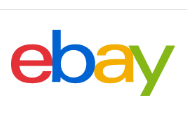

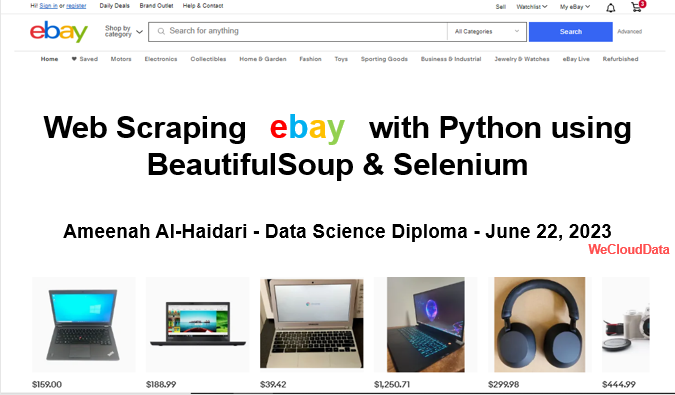

### Project/Goals

Scraping eBay Data
For this project, I will scrape data from the eBay site for the term “Laptop Computer”. This will include product details, pricing and more. I retrieve structured data, investigate and clean data, analyze and visualize data from ebay website by web scraping with Python using Beautifulsoup(bs4).

Ebay is the one of largest and E-commercial website in the world. Therefore, I will be fetching about the laptops that selling on the ebay. 

Under the conditions:
-  the feautures of computer which called laptop computer
- auction
- 3D Camera
- Bluetooth
- Built-in Microphone
- Built-in Webcam
- Convertible 2-in-1 Laptop/Tablet
- Double Screen(15) Items (15)
- Wi-Fi(2,299) Items (2,299),
and sorted by time newely listed.
There are more than 3,500+ results for laptop computers

Finally, In this part of the project, I will clean and analyze collected data and interpret the results using statistical coeffients and viualization.


### Process 

The Steps:
- Apply Web scraping to collect data from the ebay web page and store it in a structured format, such as a CSV file. 
- Parse ebay site using Python libraries, Requests, BeautifulSoup (bs4).
- Import libraries
- Create response object
- Create a Beautiful Soup object
- Explore HTML tree
- Extract elements of the table
- Extract other necessary information using BeautifulSoup.
- Clean Data
- Vizualize data
- Analyze data
- Display presentation
- Deployed



### Results

- 'eBay' web scraping is one of the best scraping target to track product prices and how to achieve that.
- understood how inconsistent the structure of ebay’s pages is. The scraper built here might therefore work for one product but not for another.
- Also, ebay’s UI changes often, which forces you to continually maintain the script. 
- For the project:
    - More than 3,500 data "items" were automated
    - Found the most popular companies are DELL, Hp, and Lenovo
    - Customers prefer to buy and sell used laptop computer than buy new one
    - there are correlation and relation between price and other features.
    - there are correlation between the conditions and prices



### 1. Import libraries

In [2]:
import requests

import pandas as pd
import csv
import re
import numpy as np
import random

from time import sleep
from datetime import datetime

from bs4 import BeautifulSoup 

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import undetected_chromedriver as uc
from selenium.webdriver import ActionChains
from selenium.webdriver.common.action_chains import ActionChains

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter # Keep track of our term counts
import json # For parsing json


# $\Delta$ BeautifulSoup

### Request Status

In [16]:
url = 'https://www.ebay.com/'
response = requests.get(url)
print('Server responded:', response.status_code)

Server responded: 200


### Get the page content

In [17]:
response.content

b'<!DOCTYPE html><html lang=en><!--<![endif]--><head><!--M#s0-0-3--><!--M/--><style>\n    .font-marketsans body {\n        font-family: "Market Sans", Arial, sans-serif;\n    }\n</style><script>\n    (function() {\n        var useCustomFont = (\'fontDisplay\' in document.documentElement.style) ||\n                        (localStorage && localStorage.getItem(\'ebay-font\'));\n        if (useCustomFont) {\n            document.documentElement.classList.add(\'font-marketsans\');\n        }\n    })();\n</script><link rel=preload as=image href=https://ir.ebaystatic.com/pictures/aw/pics/s_1x2.gif><meta charset=utf-8><link rel=icon href=https://pages.ebay.com/favicon.ico><meta name=viewport content="width=device-width, initial-scale=1, user-scalable=yes, minimum-scale=1"><meta http-equiv=X-UA-Compatible content=IE=edge><link rel="dns-prefetch" href="//ir.ebaystatic.com"><link rel="dns-prefetch" href="//secureir.ebaystatic.com"><link rel="dns-prefetch" href="//i.ebayimg.com"><link rel="dns-pr

### Make a Beautiful soup object to parse the contents

In [18]:
soup = BeautifulSoup(response.content)
soup

<!DOCTYPE html>
<html lang="en"><!--<![endif]--><head><!--M#s0-0-3--><!--M/--><style>
    .font-marketsans body {
        font-family: "Market Sans", Arial, sans-serif;
    }
</style><script>
    (function() {
        var useCustomFont = ('fontDisplay' in document.documentElement.style) ||
                        (localStorage && localStorage.getItem('ebay-font'));
        if (useCustomFont) {
            document.documentElement.classList.add('font-marketsans');
        }
    })();
</script><link as="image" href="https://ir.ebaystatic.com/pictures/aw/pics/s_1x2.gif" rel="preload"/><meta charset="utf-8"/><link href="https://pages.ebay.com/favicon.ico" rel="icon"/><meta content="width=device-width, initial-scale=1, user-scalable=yes, minimum-scale=1" name="viewport"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><link href="//ir.ebaystatic.com" rel="dns-prefetch"/><link href="//secureir.ebaystatic.com" rel="dns-prefetch"/><link href="//i.ebayimg.com" rel="dns-prefetch"/><link hr

In [19]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [20]:
soup.find('p').get_text()

'Argentina'

### To get_page function, take different parameters with number of page parameter.
#### the parameters:
- the feautures of computer which called laptop computer
- auction
- 3D Camera
- Bluetooth
- Built-in Microphone
- Built-in Webcam
- Convertible 2-in-1 Laptop/Tablet
- Double Screen(15) Items (15)
- Wi-Fi(2,299) Items (2,299)

My https is 
#https://www.ebay.com/sch/i.html?_dcat=177&_fsrp=1&_from=R40&_nkw=laptop+computer&_sacat=0&LH_Auction=1&Features=3D%2520Camera%7CBluetooth%7CBuilt%252Din%2520Microphone%7CBuilt%252Din%2520Webcam%7CConvertible%25202%252Din%252D1%2520Laptop%252FTablet%7CDouble%2520Screen%7CWi%252DFi&_sop=12&_pgn=3

I'll explain the parameters that chosen and should be replaced as {}
https://www.ebay.com/sch/i.html?_dcat=177&_fsrp=1&_from=R40&_nkw
    =laptop+computer&_sacat    # {category}
    =0&LH_Auction=1           # {BuyingFormat}
    &Features=3D%2520Camera    # {Futeaure1}
    %7CBluetooth%7CBuilt%252Din  # {Futeaure2}
    %2520Microphone%7CBuilt%252Din   # {Futeaure3}
    %2520Webcam             # {Futeaure4}
    %7CConvertible%25202%252Din%252D1%2520Laptop%252FTablet # {Futeaure5}
    %7CDouble%2520Screen  # {Futeaure6}
    %7CWi%252DFi&_sop=12  # {Futeaure7}
    &_pgn=3   # {page}
    
 If I want to build https with the parameters, it would be like this

 ##### https with parameters:
 https://www.ebay.com/sch/i.html?_dcat=177&_fsrp=1&_from=R40&_nkw={category}&_sacat=0&LH_{BuyingFormat}=1&Features=3D%2520{Futeaure1}%7C{Futeaure2}%7CBuilt%252Din%2520{Futeaure3}%7CBuilt%252Din%2520{Futeaure4}%7{Futeaure5}%25202%252Din%252D1%2520{Futeaure5}%252F{Futeaure5}%7C{Futeaure6}%2520{Futeaure6}%7C{Futeaure7}&_sop=12&_pgn={page}
 
And def function will be like this

def get_page(page, category, BuyingFormat, Futeaure1, Futeaure2, Futeaure3, Futeaure4, Futeaure5, Futeaure6, Futeaure7):

I chose this https with those parameters but I will write the get_page function
as one variable page

In [21]:
#https://www.ebay.com/sch/i.html?_dcat=177&_fsrp=1&_from=R40&_nkw=laptop+computer&_sacat=0&LH_Auction=1&Features=3D%2520Camera%7CBluetooth%7CBuilt%252Din%2520Microphone%7CBuilt%252Din%2520Webcam%7CConvertible%25202%252Din%252D1%2520Laptop%252FTablet%7CDouble%2520Screen%7CWi%252DFi&_sop=12&_pgn=3

def get_page(page):
    url = f'https://www.ebay.com/sch/i.html?_dcat=177&_fsrp=1&_from=R40&_nkw=laptop+computer&_sacat=0&LH_Auction=1&Features=3D%2520Camera%7CBluetooth%7CBuilt%252Din%2520Microphone%7CBuilt%252Din%2520Webcam%7CConvertible%25202%252Din%252D1%2520Laptop%252FTablet%7CDouble%2520Screen%7CWi%252DFi&_sop=12&_pgn={page}'
    response = requests.get(url)
    soup = BeautifulSoup(response.content)
    return soup

# $\Delta$ Parsing html with Beautifulsoup

In [22]:
soup = get_page('3')
soup

<!DOCTYPE html>
<!--[if IE 9]><html class="ie9" lang="en"><![endif]--><!--[if gt IE 9]><!--><html lang="en"><!--<![endif]--><!--M#s0-2--><body><noscript class="x-page-config"></noscript><!--M/--><meta content="IE=edge" http-equiv="X-UA-Compatible"/><script>"use strict";if(window.PerformanceObserver&&performance&&performance.mark&&performance.getEntriesByName){window.SRP=window.SRP||{};var paintObserver=new window.PerformanceObserver((function(e){var r=e.getEntries();if(r.sort((function(e,r){return e.startTime-r.startTime})),r&&!(r.length<2)){var n=r[1].startTime;window.SRP.TTI_TIMER={lastInteractiveWindow:n};var t=new window.PerformanceObserver((function(e){for(var r=e.getEntries(),i=0,a=r.length;i<a;i++)r[i].startTime-n>=5e3&&(window.SRP.TTI_TIMER.timeToInteract=n,t.disconnect()),n=r[i].startTime+r[i].duration,window.SRP.TTI_TIMER.lastInteractiveWindow=n}));t.observe({entryTypes:["longtask"]}),paintObserver.disconnect()}}));paintObserver.observe({entryTypes:["paint"]})};</script><titl

### Selecting html tags

In [23]:
# find selects the first one
soup.find('p')

<p class="srp-shipping-location__header"><!--F#f_0--><!--F#1-->Update your shipping location<!--F/--><!--F/--></p>

In [24]:
soup.find('a', class_ = 's-item__link')

<a _sp="" class="s-item__link" data-interactions='[{"actionKind":"NAVSRC","interaction":"wwFVrK2vRE0lhQY0MREUzME5KNVY2VE1XNkJEMTUAAAg3NDAwDE5BVlNSQwA="}]' data-s-rlat679='{"eventFamily":"LST","eventAction":"ACTN","actionKind":"NAVSRC","actionKinds":["NAVSRC"],"operationId":"","flushImmediately":false,"eventProperty":{"trackableId":"01GDF2P4GS7EBZ8M2AWN707B","interaction":"wwFVrK2vRE0lhQY0MREUzME5KNVY2VE1XNkJEMTUAAAg3NDAwDE5BVlNSQwA="}}' href="https://ebay.com/itm/123456?hash=item28caef0a3a:g:E3kAAOSwlGJiMikD&amp;amdata=enc%3AAQAHAAAAsJoWXGf0hxNZspTmhb8%2FTJCCurAWCHuXJ2Xi3S9cwXL6BX04zSEiVaDMCvsUbApftgXEAHGJU1ZGugZO%2FnW1U7Gb6vgoL%2BmXlqCbLkwoZfF3AUAK8YvJ5B4%2BnhFA7ID4dxpYs4jjExEnN5SR2g1mQe7QtLkmGt%2FZ%2FbH2W62cXPuKbf550ExbnBPO2QJyZTXYCuw5KVkMdFMDuoB4p3FwJKcSPzez5kyQyVjyiIq6PB2q%7Ctkp%3ABlBMULq7kqyXYA" tabindex="-1" target="_blank"><div class="s-item__title"><span aria-level="3" role="heading"><!--F#f_0-->Shop on eBay<!--F/--></span></div><span class="clipped">Opens in a new window or ta

In [25]:
soup.find('a', class_ = 's-item__link').get_text()

'Shop on eBayOpens in a new window or tab'

### The total number of laptop computers under those parameters

In [26]:
tag_text1 = soup.find('h1').get_text(strip=True)
tag_text1

'3,500+ results forlaptop computer'

In [27]:
tag_int = tag_text1.split()[0]
tag_int

'3,500+'

In [28]:
soup.find('h2').get_text()

'Shop by category'

In [29]:
soup.find('h3').get_text().replace("''", "")

'Category'

### Selecting nested tags

In [30]:
soup.find('div')

<div class="x-header"><script type="text/javascript">var GHpre = {si:false}</script><style>.gh-hide-if-nocss{display:none;}.gh-ar-hdn{color:#fff}</style> <div class="gh-acc-exp-div gh-hide-if-nocss"><a class="gh-acc-a" href="#mainContent" id="gh-hdn-stm">Skip to main content</a></div><!--[if lt IE 9]><div id="gh" role="banner" class="gh-IE8 gh-flex gh-pre-js gh-w "><![endif]--><header class="gh-ui-6-5 gh-flex gh-pre-js gh-w gh-sch-prom" data-treatment="" id="gh" role="banner"><table class="gh-tbl" role="presentation"><tbody><tr><td class="gh-td"><a _sp="m570.l2586" href="https://www.ebay.com/" id="gh-la"><img alt="eBay Logo" height="200" id="gh-logo" src="https://ir.ebaystatic.com/rs/v/fxxj3ttftm5ltcqnto1o4baovyl.png" style="clip:rect(47px, 118px, 95px, 0px); position:absolute; top:-47px;left:0" width="250"/></a></td><td class="gh-td"></td><td class="gh-td"></td><td class="gh-td"><div class="gh-hide-if-nocss" id="gh-shop"><button aria-controls="gh-sbc-o" aria-expanded="false" class="gh

In [31]:
soup.find('div', class_='gh-acc-exp-div gh-hide-if-nocss')

<div class="gh-acc-exp-div gh-hide-if-nocss"><a class="gh-acc-a" href="#mainContent" id="gh-hdn-stm">Skip to main content</a></div>

In [32]:
soup.find('div').span 

<span aria-label="Loading" class="gh-spinner" role="img"></span>

In [36]:
soup.find('div').span.children

### Find elements by tag name

In [37]:
# find all `li` elements
 
soup.find_all("li")

[<li class="gh-t" id="gh-eb-u"><noscript class="gh-t gh-spr">Hi (<a href="https://signin.ebay.com/ws/eBayISAPI.dll?SignIn&amp;_trksid=m570.l3348">Sign in</a> to bid or buy)</noscript><script> var supressUserGreeting = true; (function(){try{ var sup = !!(supressUserGreeting && typeof window.GHpre !== 'undefined' && !window.GHpre.si); var d=document.cookie,a=((a=d.match(/u1f[^a-zA-Z0-9]([^^]*)[0-9a-z]{8}/))?a[1].replace(/\+/g," "):"").replace(/(.{12}).*/,"$1...");if(/[<>%&'\/]/.test(a)){throw(1)}document.write("<span id=gh-ug"+(!a||/u1p.QEBfX/.test(d)?' class=gh-ug-guest>Hi! <a href="https://signin.ebay.com/ws/eBayISAPI.dll?SignIn&_trksid=m570.l1524" rel="nofollow" _sp="m570.l1524">Sign in</a> <span id="gh-ug-flex">or <a href="https://signup.ebay.com/pa/crte?_trksid=m570.l2621" rel="nofollow" _sp="m570.l2621">register</a></span>':' style="margin-right:3px">Hi <b>-User-</b>!'.replace(/-User-/,sup ? '' : decodeURIComponent(escape(a))))+"</span>")}catch(b){document.write("<style>#gh-topl{di

> Find all URLs in the `<li>` tag

In [38]:
# print element types
for li in soup.find_all("li"):
    print(type(li))

<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.

In [39]:
# get all URLs
for li in soup.find_all("li"):
    a = li.find("a")
    print(a)

<a href="https://signin.ebay.com/ws/eBayISAPI.dll?SignIn&amp;_trksid=m570.l3348">Sign in</a>
<a _sp="m570.l3188" class="gh-p" data-sp="m570.l3188" href="https://www.ebay.com/deals"> Daily Deals</a>
<a _sp="m570.l47233" class="gh-p" data-sp="m570.l47233" href="https://www.ebay.com/b/Brand-Outlet/bn_7115532402"> Brand Outlet</a>
<a _sp="m570.l1545" class="gh-p" data-sp="m570.l1545" href="https://ocsnext.ebay.com/ocs/home"> Help &amp; Contact</a>
<a _sp="m570.l1528" class="gh-p" data-sp="m570.l1528" href="https://www.ebay.com/sl/sell"> Sell</a>
<a _sp="m570.l47137" class="gh-eb-li-a gh-rvi-menu watchlist-menu" href="https://www.ebay.com/mye/myebay/watchlist" title="Watchlist">Watchlist<i class="gh-sprRetina gh-eb-arw gh-rvi-chevron" data-sp="m570.l47137"></i></a>
<a _sp="m570.l2919" class="gh-eb-li-a gh-rvi-menu" href="https://www.ebay.com/mys/home?source=GBH" title="My eBay">My eBay<i class="gh-sprRetina gh-eb-arw gh-rvi-chevron" data-sp="m570.l2919"></i></a>
<a _sp="m570.l1533" class="g

In [169]:
# get all URLs
for li in soup.find_all("li"):
    a = li.find("a")
    print(a.attrs['href'])

https://signin.ebay.com/ws/eBayISAPI.dll?SignIn&_trksid=m570.l3348
https://www.ebay.com/deals
https://www.ebay.com/b/Brand-Outlet/bn_7115532402
https://ocsnext.ebay.com/ocs/home
https://www.ebay.com/sl/sell
https://www.ebay.com/mye/myebay/watchlist
https://www.ebay.com/mys/home?source=GBH
https://www.ebay.com/mye/myebay/summary
https://www.ebay.com/mye/myebay/rvi
https://www.ebay.com/mye/myebay/v2/bidsoffers
https://www.ebay.com/mye/myebay/watchlist
https://www.ebay.com/mye/myebay/purchase
https://www.ebay.com/mye/buyagain
https://www.ebay.com/mys/home?CurrentPage=MyeBayAllSelling&ssPageName=STRK:ME:LNLK:MESX&source=GBH
https://www.ebay.com/myb/SavedSearches
https://www.ebay.com/myb/SavedSellers
https://www.ebay.com/g/mygarage
https://mesg.ebay.com/mesgweb/ViewMessages/0
https://www.ebay.com/collection/hub
https://www.ebay.com/collection/category?notionalTypeId=Vault


AttributeError: 'NoneType' object has no attribute 'attrs'

### Selecting an attribute

In [40]:
soup.find('a', class_='s-item__link').get('href')

'https://ebay.com/itm/123456?hash=item28caef0a3a:g:E3kAAOSwlGJiMikD&amdata=enc%3AAQAHAAAAsJoWXGf0hxNZspTmhb8%2FTJCCurAWCHuXJ2Xi3S9cwXL6BX04zSEiVaDMCvsUbApftgXEAHGJU1ZGugZO%2FnW1U7Gb6vgoL%2BmXlqCbLkwoZfF3AUAK8YvJ5B4%2BnhFA7ID4dxpYs4jjExEnN5SR2g1mQe7QtLkmGt%2FZ%2FbH2W62cXPuKbf550ExbnBPO2QJyZTXYCuw5KVkMdFMDuoB4p3FwJKcSPzez5kyQyVjyiIq6PB2q%7Ctkp%3ABlBMULq7kqyXYA'

### Selecting multiple html tags

In [41]:
soup.find_all('a', class_='s-item__link')

[<a _sp="" class="s-item__link" data-interactions='[{"actionKind":"NAVSRC","interaction":"wwFVrK2vRE0lhQY0MREUzME5KNVY2VE1XNkJEMTUAAAg3NDAwDE5BVlNSQwA="}]' data-s-rlat679='{"eventFamily":"LST","eventAction":"ACTN","actionKind":"NAVSRC","actionKinds":["NAVSRC"],"operationId":"","flushImmediately":false,"eventProperty":{"trackableId":"01GDF2P4GS7EBZ8M2AWN707B","interaction":"wwFVrK2vRE0lhQY0MREUzME5KNVY2VE1XNkJEMTUAAAg3NDAwDE5BVlNSQwA="}}' href="https://ebay.com/itm/123456?hash=item28caef0a3a:g:E3kAAOSwlGJiMikD&amp;amdata=enc%3AAQAHAAAAsJoWXGf0hxNZspTmhb8%2FTJCCurAWCHuXJ2Xi3S9cwXL6BX04zSEiVaDMCvsUbApftgXEAHGJU1ZGugZO%2FnW1U7Gb6vgoL%2BmXlqCbLkwoZfF3AUAK8YvJ5B4%2BnhFA7ID4dxpYs4jjExEnN5SR2g1mQe7QtLkmGt%2FZ%2FbH2W62cXPuKbf550ExbnBPO2QJyZTXYCuw5KVkMdFMDuoB4p3FwJKcSPzez5kyQyVjyiIq6PB2q%7Ctkp%3ABlBMULq7kqyXYA" tabindex="-1" target="_blank"><div class="s-item__title"><span aria-level="3" role="heading"><!--F#f_0-->Shop on eBay<!--F/--></span></div><span class="clipped">Opens in a new window or t

In [42]:
len(soup.find_all('a', class_='s-item__link'))

61

Links for all items in one page

In [43]:
laptopComp_urls = []

for tag in soup.find_all('a', class_='s-item__link'):
    laptopComp_urls.append(tag.get('href'))

In [45]:
laptopComp_urls

['https://ebay.com/itm/123456?hash=item28caef0a3a:g:E3kAAOSwlGJiMikD&amdata=enc%3AAQAHAAAAsJoWXGf0hxNZspTmhb8%2FTJCCurAWCHuXJ2Xi3S9cwXL6BX04zSEiVaDMCvsUbApftgXEAHGJU1ZGugZO%2FnW1U7Gb6vgoL%2BmXlqCbLkwoZfF3AUAK8YvJ5B4%2BnhFA7ID4dxpYs4jjExEnN5SR2g1mQe7QtLkmGt%2FZ%2FbH2W62cXPuKbf550ExbnBPO2QJyZTXYCuw5KVkMdFMDuoB4p3FwJKcSPzez5kyQyVjyiIq6PB2q%7Ctkp%3ABlBMULq7kqyXYA',
 'https://www.ebay.com/itm/385687227040?hash=item59ccc00aa0%3Ag%3AddUAAOSwp3VkjFx5&amdata=enc%3AAQAIAAAAwImxJex%2BfAb3AujwJ87fMiTHZ%2Fq09ZGM4q3KTq6w9nrgDfN5RAMrWDGS7PoiMkWqiofKkHo3CiRphciV%2Fzmgez9XIOGniHDTXBCFmtP8MkYKVyjsr91k3B5szCLsY1uoiAN6kYU8fsna1nvIp7DwFWADRGjFGzfm2Fot8JVpaVs%2FigR6aKGen%2BisVfqJ1BEK8CJ0ITn1O%2BLpy8Fc%2BHob0Z7Cg9zw5fFS0Oyyo3CeYacXT11LVTJ5EowsVeT4FeO1Yw%3D%3D%7Ctkp%3ABk9SR9b4kpWcYg&LH_Auction=1',
 'https://www.ebay.com/itm/225620103206?epid=16053372056&hash=item3488019026%3Ag%3AM5sAAOSwsJxki6Om&amdata=enc%3AAQAIAAAAwHCjnoOrFuzE68egaDY7RqN02eSTZ7wi2cYVUpIgTos3gtbz0Oiecxt1rx88LocGouUwIIAA8oWdqH%2F%2BlyxTZtkHCs

### Collect the information nationality of the seller

In [40]:
country = [tag.get_text() for tag in soup.find_all('span', class_="s-item__location s-item__itemLocation")]
country                   

['from United States',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from Canada',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from Lithuania',
 'from United States',
 'from Canada',
 'from United States',
 'from United States',
 'from Canada',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from Canada',
 'from United States',
 'from Australia',
 'from Canada',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from United States',
 'from Canada',
 'from United S

# The Steps of Extracting Data from ebay, Clean, Analye, and Vizualize them

### The Steps of Extracting Data from ebay

### Create an entry point of the Scrapper

If main function block, the condition should be checked wether the file ebay-scrapper.py is run
directly from the console or not. If the file is running from the console its '__name__'
attribute will be equal to '__main__', but if the file will be imported to another script 
its __name__ attribute will contain the name of the file 'ebay_scrapper'. In this case its name
attribute will be equal to the 'ebay_scrapper.py'. And if this block returns True then the
main() function will be called. So I am creating a new function main() with the pass for 
a while.. the main() function will play the role of a hub, that will manage the calls of other
functions and we will collect scraped data. 

In [300]:
def main():
    pass


if __name__ == '__main__':
    main()

### Create Response and a BeautifulSoup Object

In [301]:
# to check the status responed and to give extra information about any web page status, will use if condition
# I chose lxml because it most efficient and fast parser 
def get_page(url):
    response = requests.get(url)
    print('Server responded:', response.status_code)
    print('')
    if not response.ok:
        print('Server responded:',response.status_code)
    else:
        soup = BeautifulSoup(response.text, 'lxml')
    print(soup)


def main():
    # ebay web page afer apply the conditions and sorted     
    url = 'https://www.ebay.com/sch/i.html?_from=R40&_nkw=laptop+computers&_sacat=0&LH_TitleDesc=0&_fsrp=1&LH_Auction=1&_dcat=177&Features=Wi%252DFi%7CBuilt%252Din%2520Webcam%7CConvertible%25202%252Din%252D1%2520Laptop%252FTablet%7CDouble%2520Screen%7C3D%2520Camera%7CBluetooth%7CBuilt%252Din%2520Microphone&_sop=10'
    # as an argument
    get_page(url)


if __name__ == '__main__':
    main()

Server responded: 200

<!DOCTYPE html>
<!--[if IE 9]><html class="ie9" lang="en"><![endif]--><!--[if gt IE 9]><!--><html lang="en"><!--<![endif]--><!--M#s0-2--><body><noscript class="x-page-config"></noscript><!--M/--><meta content="IE=edge" http-equiv="X-UA-Compatible"/><script>"use strict";if(window.PerformanceObserver&&performance&&performance.mark&&performance.getEntriesByName){window.SRP=window.SRP||{};var paintObserver=new window.PerformanceObserver((function(e){var r=e.getEntries();if(r.sort((function(e,r){return e.startTime-r.startTime})),r&&!(r.length<2)){var n=r[1].startTime;window.SRP.TTI_TIMER={lastInteractiveWindow:n};var t=new window.PerformanceObserver((function(e){for(var r=e.getEntries(),i=0,a=r.length;i<a;i++)r[i].startTime-n>=5e3&&(window.SRP.TTI_TIMER.timeToInteract=n,t.disconnect()),n=r[i].startTime+r[i].duration,window.SRP.TTI_TIMER.lastInteractiveWindow=n}));t.observe({entryTypes:["longtask"]}),paintObserver.disconnect()}}));paintObserver.observe({entryTypes:["pa

### Scrape HTML Content From a Page

- Change print(soup) to return soup and delete the print command
- Create def get_products(soup) function to parse data
- Open the first product web page to collect the needed data
- https://www.ebay.com/itm/256115384999?epid=16046118424&hash=item3ba1aaa2a7%3Ag%3AkiwAAOSwYm1kkLtH&amdata=enc%3AAQAIAAAA4GSniwcHz5%2F4s6gnhJ50bFulfPKon1PnzXKam8tx9IUyZHJ%2B75uFF9DHz4m3OLJ1Jga%2B62xG6eNYp5quLrU6bl8zwsDiO9kqF77dODQjjGu8Yf4lEhHZP0WZKCMNLH%2Fns1o9sp4TxIYcLN1qec9YRLE3IdzQaofNT46Sj9N5YZabAQ6%2FPvB9Gk%2F52veRd1IOhhWWRYr8OEduMTXxjubw%2F94WaRAIeT1uhTHVmFjABp9JmcuiTQzt2NiYB4exgZSEar6DpJqHyjWTyZ0i9DJAFn2xHf9u1Ca1mL16WnIPq7Dz%7Ctkp%3ABk9SR86knNaaYg&LH_Auction=1

- Choose variable title, 

## The main code to extract the data from ebay

In [180]:
global response 

def get_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    if not response.ok:
        print('Server responded:',response.status_code)
    else:
        soup = BeautifulSoup(response.text, 'lxml')
    return soup


def get_products(soup):
    try:
        title = soup.find('h1', {'class': 'x-item-title__mainTitle'}).find('span').text 
    except:
        title = ''
    try:
        Original_price = soup.find('div', {'class': 'x-bin-price__content'}).find('span').text.strip()
        OrgCurrency, Orgprice = Original_price.split(' ')
    except:
        OrgCurrency = ''
        Orgprice = ''
    try:
        Starting_bid = soup.find('span', {'itemprop': 'price'}).find('span').text.strip()
        Currency, price = Starting_bid.split(' ')
    except:
        Currency = ''
        price = ''
    try:
        quantity_availability = soup.find('div', {'class': 'd-quantity__availability'}).find('span').text.strip().split(' ')[0]
      #  sold = soup.find('div', {'class': 'd-quantity__availability'}).find('span').find('class').text.strip().split(' ')[0]
    except:
        quantity_availability = ''
    try:
        condition = soup.find('span', {'data-testid': 'ux-textual-display'}).find('span').text 
    except:
        condition = ''


    data = {
        'Title': title,
        'Original_price': Orgprice,
        'OrgCurrency': OrgCurrency,
        'Starting_bid': price,
        'Currency': Currency,
        'Quantity_availability': quantity_availability,
        'Condition': condition
    }
    return data


def get_index_data(soup):
    try:
        links = soup.find_all('a', class_='s-item__link')
    except:
        links = []
        
    urls = [item.get('href') for item in links]
    return urls


def write_csv(Prod_data, lnln):
    with open('33EbayProduct.csv', 'a', encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        row = [Prod_data['Title'], Prod_data['Original_price'], Prod_data['OrgCurrency'], Prod_data['Starting_bid'], Prod_data['Currency'], Prod_data['Quantity_availability'], Prod_data['Condition'], lnln]
        writer.writerow(row) 
   


def main():
    url = f'https://www.ebay.com/sch/i.html?_from=R40&_nkw=laptop+computers&_sacat=0&LH_TitleDesc=0&_fsrp=1&LH_Auction=1&_dcat=177&Features=Wi%252DFi%7CBuilt%252Din%2520Webcam%7CConvertible%25202%252Din%252D1%2520Laptop%252FTablet%7CDouble%2520Screen%7C3D%2520Camera%7CBluetooth%7CBuilt%252Din%2520Microphone&_sop=10'
    for page in range(1, 60):
        products = get_index_data(get_page(url + '&_pgn={}'.format(page)))

        for lnln in products:
            Prod_data = get_products(get_page(lnln))
            print(Prod_data)
            write_csv(Prod_data, lnln)


if __name__ == '__main__':
    main()

Server responded: 404
{'Title': '', 'Original_price': '', 'OrgCurrency': '', 'Starting_bid': '', 'Currency': '', 'Quantity_availability': '', 'Condition': ''}
{'Title': 'Dell Precision 5530 - 32GB RAM - Intel i7-8850U - 512GB SSD (See Notes)', 'Original_price': '', 'OrgCurrency': '', 'Starting_bid': '$0.99', 'Currency': 'US', 'Quantity_availability': '', 'Condition': 'Used'}
{'Title': 'Samsung Galaxy Book S Snapdragon 8cx 2.84GHz 8GB RAM 256GB SSD 13.3" FHD LTE W11', 'Original_price': '$350.00', 'OrgCurrency': 'US', 'Starting_bid': '$200.00', 'Currency': 'US', 'Quantity_availability': '', 'Condition': 'Used'}
{'Title': 'Lenovo Thinkpad T490 14" (256 SSD, Intel Core i5 8th Gen., 1.60 GHz, 8 GB Ram', 'Original_price': '', 'OrgCurrency': '', 'Starting_bid': '$133.00', 'Currency': 'US', 'Quantity_availability': '', 'Condition': 'Used'}
{'Title': 'Razer Blade 14" (1TB SSD, AMD Ryzen 9 6000 Series, 4.90 GHz, 16GB, GeForce...', 'Original_price': '$1,381.00', 'OrgCurrency': 'US', 'Starting_bid

In [3]:
colnames=['Title', 'Original_price', 'OrgCurrency', 'Starting_bid', 'Currency', 'Quantity_availability', 'Condition', 'Links_Item']
df_Item = pd.read_csv('33EbayProduct.csv', names=colnames, header=None)
print(df_Item)

                                                  Title Original_price  \
0                                                   NaN            NaN   
1     Dell Precision 5530 - 32GB RAM - Intel i7-8850...            NaN   
2     Samsung Galaxy Book S Snapdragon 8cx 2.84GHz 8...        $350.00   
3     Lenovo Thinkpad T490 14" (256 SSD, Intel Core ...            NaN   
4     Razer Blade 14" (1TB SSD, AMD Ryzen 9 6000 Ser...      $1,381.00   
...                                                 ...            ...   
3549  HP 8560p 15.6" Laptop Computer Core i7 2720QM ...            NaN   
3550  Dell Latitude E6420 ATG i5-2520M 2.50GHz/320GB...            NaN   
3551  HP Chromebook 14-ca051wm 14 inch (32 GB, Intel...            NaN   
3552  Apple MacBook Air 13" Core i5 1.6 GHz 8GB RAM ...            NaN   
3553  Lenovo ThinkPad L430 i5-3230M 2.60Ghz 4GB RAM ...         $99.99   

     OrgCurrency Starting_bid Currency  Quantity_availability Condition  \
0            NaN          NaN      N

# EDA

In [4]:
df_Item.head()

Title Original_price  \
0                                                NaN            NaN   
1  Dell Precision 5530 - 32GB RAM - Intel i7-8850...            NaN   
2  Samsung Galaxy Book S Snapdragon 8cx 2.84GHz 8...        $350.00   
3  Lenovo Thinkpad T490 14" (256 SSD, Intel Core ...            NaN   
4  Razer Blade 14" (1TB SSD, AMD Ryzen 9 6000 Ser...      $1,381.00   

  OrgCurrency Starting_bid Currency  Quantity_availability Condition  \
0         NaN          NaN      NaN                    NaN       NaN   
1         NaN        $0.99       US                    NaN      Used   
2          US      $200.00       US                    NaN      Used   
3         NaN      $133.00       US                    NaN      Used   
4          US      $905.00       US                    NaN      Used   

                                          Links_Item  
0  https://ebay.com/itm/123456?hash=item28caef0a3...  
1  https://www.ebay.com/itm/266307696950?hash=ite...  
2  https://www.ebay.com/itm/235060084763?hash=ite...  
3  https://www.ebay.com/itm/166186133223?hash=ite...  
4  https://www.ebay.com/itm/364315016596?epid=140...

In [5]:
print(df_Item.shape)

(3554, 8)


In [6]:
df_Item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  3494 non-null   object 
 1   Original_price         1126 non-null   object 
 2   OrgCurrency            1126 non-null   object 
 3   Starting_bid           3494 non-null   object 
 4   Currency               3494 non-null   object 
 5   Quantity_availability  13 non-null     float64
 6   Condition              3494 non-null   object 
 7   Links_Item             3554 non-null   object 
dtypes: float64(1), object(7)
memory usage: 222.3+ KB


##### Drop the first row which is the first link for the main page and not under the conditions of the parameters

In [7]:
df_Item1 = df_Item.drop(df_Item.index[0])
df_Item1

Title Original_price  \
1     Dell Precision 5530 - 32GB RAM - Intel i7-8850...            NaN   
2     Samsung Galaxy Book S Snapdragon 8cx 2.84GHz 8...        $350.00   
3     Lenovo Thinkpad T490 14" (256 SSD, Intel Core ...            NaN   
4     Razer Blade 14" (1TB SSD, AMD Ryzen 9 6000 Ser...      $1,381.00   
5     Lenovo ThinkPad T490 Laptop 14" i7-8665U 1.90G...        $299.99   
...                                                 ...            ...   
3549  HP 8560p 15.6" Laptop Computer Core i7 2720QM ...            NaN   
3550  Dell Latitude E6420 ATG i5-2520M 2.50GHz/320GB...            NaN   
3551  HP Chromebook 14-ca051wm 14 inch (32 GB, Intel...            NaN   
3552  Apple MacBook Air 13" Core i5 1.6 GHz 8GB RAM ...            NaN   
3553  Lenovo ThinkPad L430 i5-3230M 2.60Ghz 4GB RAM ...         $99.99   

     OrgCurrency Starting_bid Currency  Quantity_availability Condition  \
1            NaN        $0.99       US                    NaN      Used   
2             US      $200.00       US                    NaN      Used   
3            NaN      $133.00       US                    NaN      Used   
4             US      $905.00       US                    NaN      Used   
5             US      $199.99       US                    NaN      Used   
...          ...          ...      ...                    ...       ...   
3549         NaN      $150.00       US                    NaN      Used   
3550         NaN       $85.00       US                    NaN      Used   
3551         NaN      $100.00       US                    NaN      Used   
3552         NaN      $189.00       US                    NaN      Used   
3553           C       $69.99        C                    NaN      Used   

                                             Links_Item  
1     https://www.ebay.com/itm/266307696950?hash=ite...  
2     https://www.ebay.com/itm/235060084763?hash=ite...  
3     https://www.ebay.com/itm/166186133223?hash=ite...  
4     https://www.ebay.com/itm/364315016596?epid=140...  
5     https://www.ebay.com/itm/256117518335?hash=ite...  
...                                                 ...  
3549  https://www.ebay.com/itm/256110669635?hash=ite...  
3550  https://www.ebay.com/itm/256110669639?hash=ite...  
3551  https://www.ebay.com/itm/325694931100?epid=240...  
3552  https://www.ebay.com/itm/185946968743?hash=ite...  
3553  https://www.ebay.com/itm/275911497540?hash=ite...  

[3553 rows x 8 columns]

Drop (Links_Item) column of pages to clean Data. We can store it again if we want to collect more information from items by writing new codes

In [8]:
df_Item2 = df_Item1.drop(['Links_Item'], axis=1)
df_Item2

Title Original_price  \
1     Dell Precision 5530 - 32GB RAM - Intel i7-8850...            NaN   
2     Samsung Galaxy Book S Snapdragon 8cx 2.84GHz 8...        $350.00   
3     Lenovo Thinkpad T490 14" (256 SSD, Intel Core ...            NaN   
4     Razer Blade 14" (1TB SSD, AMD Ryzen 9 6000 Ser...      $1,381.00   
5     Lenovo ThinkPad T490 Laptop 14" i7-8665U 1.90G...        $299.99   
...                                                 ...            ...   
3549  HP 8560p 15.6" Laptop Computer Core i7 2720QM ...            NaN   
3550  Dell Latitude E6420 ATG i5-2520M 2.50GHz/320GB...            NaN   
3551  HP Chromebook 14-ca051wm 14 inch (32 GB, Intel...            NaN   
3552  Apple MacBook Air 13" Core i5 1.6 GHz 8GB RAM ...            NaN   
3553  Lenovo ThinkPad L430 i5-3230M 2.60Ghz 4GB RAM ...         $99.99   

     OrgCurrency Starting_bid Currency  Quantity_availability Condition  
1            NaN        $0.99       US                    NaN      Used  
2             US      $200.00       US                    NaN      Used  
3            NaN      $133.00       US                    NaN      Used  
4             US      $905.00       US                    NaN      Used  
5             US      $199.99       US                    NaN      Used  
...          ...          ...      ...                    ...       ...  
3549         NaN      $150.00       US                    NaN      Used  
3550         NaN       $85.00       US                    NaN      Used  
3551         NaN      $100.00       US                    NaN      Used  
3552         NaN      $189.00       US                    NaN      Used  
3553           C       $69.99        C                    NaN      Used  

[3553 rows x 7 columns]

#### Displate the full text of the Title column to be able to extract some information from the words for sorting

In [9]:
pd.options.display.max_colwidth = 2000
df_Item2['Title']

1                Dell Precision 5530 - 32GB RAM - Intel i7-8850U - 512GB SSD (See Notes)
2       Samsung Galaxy Book S Snapdragon 8cx 2.84GHz 8GB RAM 256GB SSD 13.3" FHD LTE W11
3          Lenovo Thinkpad T490 14" (256 SSD, Intel Core i5 8th Gen., 1.60 GHz, 8 GB Ram
4          Razer Blade 14" (1TB SSD, AMD Ryzen 9 6000 Series, 4.90 GHz, 16GB, GeForce...
5                 Lenovo ThinkPad T490 Laptop 14" i7-8665U 1.90GHz 16GB 512GB SSD Win 11
                                              ...                                       
3549     HP 8560p 15.6" Laptop Computer Core i7 2720QM 2.2GHZ/ 8GB RAM/ 500GB HDD 11 Pro
3550    Dell Latitude E6420 ATG i5-2520M 2.50GHz/320GB HDd /4GB RAM /Windows11/New Batt/
3551    HP Chromebook 14-ca051wm 14 inch (32 GB, Intel Celeron N3350, 1.1GHz, 4GB SDRAM)
3552                  Apple MacBook Air 13" Core i5 1.6 GHz 8GB RAM 251GB SSD Early 2015
3553      Lenovo ThinkPad L430 i5-3230M 2.60Ghz 4GB RAM 500GB HDD Win 8.1 WEBCAM Grade A
Name: Title, Length: 

# Extract extra Data

Extract Brand and Ram from the Title column.
Calculate the number of NAN

### Extract Brand

In [10]:
df_Item2['Brand'] = df_Item2['Title'].str.split(' ').str[0]
df_Item2['Brand']

1          Dell
2       Samsung
3        Lenovo
4         Razer
5        Lenovo
         ...   
3549         HP
3550       Dell
3551         HP
3552      Apple
3553     Lenovo
Name: Brand, Length: 3553, dtype: object

In [11]:
df_Item2['Brand'].isna().sum()

59

### Extract RAM

Extract RAM from the Title column. 
Note, I wrote all category as ebay Ram. The last category ebay decribe it and call it non spacified. Which will be here is Nonspacified

In [12]:
from re import search
df_Item2["RAM"]=df_Item2["Title"].str.extract(r"\b(1GB RAM|1.5GB RAM|2GB RAM|3GB RAM|4GB RAM|5GB RAM|6GB RAM|8GB RAM|10GB RAM|12GB RAM|16GB RAM|24GB RAM|32GB RAM|64GB RAM|128GB RAM|256GB RAM|512GB RAM)\b", expand=False).fillna('Nonspacified')
df_Item2["RAM"]

1           32GB RAM
2            8GB RAM
3       Nonspacified
4       Nonspacified
5       Nonspacified
            ...     
3549         8GB RAM
3550         4GB RAM
3551    Nonspacified
3552         8GB RAM
3553         4GB RAM
Name: RAM, Length: 3553, dtype: object

In [13]:
df_Item2['RAM'].isna().sum()

0

df_Item2 with the new columns Brand and RAM

In [14]:
df_Item2

Title  \
1              Dell Precision 5530 - 32GB RAM - Intel i7-8850U - 512GB SSD (See Notes)   
2     Samsung Galaxy Book S Snapdragon 8cx 2.84GHz 8GB RAM 256GB SSD 13.3" FHD LTE W11   
3        Lenovo Thinkpad T490 14" (256 SSD, Intel Core i5 8th Gen., 1.60 GHz, 8 GB Ram   
4        Razer Blade 14" (1TB SSD, AMD Ryzen 9 6000 Series, 4.90 GHz, 16GB, GeForce...   
5               Lenovo ThinkPad T490 Laptop 14" i7-8665U 1.90GHz 16GB 512GB SSD Win 11   
...                                                                                ...   
3549   HP 8560p 15.6" Laptop Computer Core i7 2720QM 2.2GHZ/ 8GB RAM/ 500GB HDD 11 Pro   
3550  Dell Latitude E6420 ATG i5-2520M 2.50GHz/320GB HDd /4GB RAM /Windows11/New Batt/   
3551  HP Chromebook 14-ca051wm 14 inch (32 GB, Intel Celeron N3350, 1.1GHz, 4GB SDRAM)   
3552                Apple MacBook Air 13" Core i5 1.6 GHz 8GB RAM 251GB SSD Early 2015   
3553    Lenovo ThinkPad L430 i5-3230M 2.60Ghz 4GB RAM 500GB HDD Win 8.1 WEBCAM Grade A   

     Original_price OrgCurrency Starting_bid Currency  Quantity_availability  \
1               NaN         NaN        $0.99       US                    NaN   
2           $350.00          US      $200.00       US                    NaN   
3               NaN         NaN      $133.00       US                    NaN   
4         $1,381.00          US      $905.00       US                    NaN   
5           $299.99          US      $199.99       US                    NaN   
...             ...         ...          ...      ...                    ...   
3549            NaN         NaN      $150.00       US                    NaN   
3550            NaN         NaN       $85.00       US                    NaN   
3551            NaN         NaN      $100.00       US                    NaN   
3552            NaN         NaN      $189.00       US                    NaN   
3553         $99.99           C       $69.99        C                    NaN   

     Condition    Brand           RAM  
1         Used     Dell      32GB RAM  
2         Used  Samsung       8GB RAM  
3         Used   Lenovo  Nonspacified  
4         Used    Razer  Nonspacified  
5         Used   Lenovo  Nonspacified  
...        ...      ...           ...  
3549      Used       HP       8GB RAM  
3550      Used     Dell       4GB RAM  
3551      Used       HP  Nonspacified  
3552      Used    Apple       8GB RAM  
3553      Used   Lenovo       4GB RAM  

[3553 rows x 9 columns]

### Remove Dollar Sign

In [15]:
df_Item2['Original_price'] = df_Item2['Original_price'].str.replace('$', '')
df_Item2['Original_price']

1            NaN
2         350.00
3            NaN
4       1,381.00
5         299.99
          ...   
3549         NaN
3550         NaN
3551         NaN
3552         NaN
3553       99.99
Name: Original_price, Length: 3553, dtype: object

In [16]:
df_Item2['Starting_bid'] = df_Item2['Starting_bid'].str.replace('$', '')
df_Item2['Starting_bid']

1         0.99
2       200.00
3       133.00
4       905.00
5       199.99
         ...  
3549    150.00
3550     85.00
3551    100.00
3552    189.00
3553     69.99
Name: Starting_bid, Length: 3553, dtype: object

To drop one column from OrgCurrency and Currency, I'll count the number of NaN. After that will fill the missing value from one column to another

In [17]:
df_Item2['OrgCurrency'].isna().sum()

2427

In [18]:
df_Item2['Currency'].isna().sum()

59

In [19]:
df_Item2[['OrgCurrency', 'Currency']]

OrgCurrency Currency
1            NaN       US
2             US       US
3            NaN       US
4             US       US
5             US       US
...          ...      ...
3549         NaN       US
3550         NaN       US
3551         NaN       US
3552         NaN       US
3553           C        C

[3553 rows x 2 columns]

There are 59 NAN in currency column . I want to fill those NAN rows from the OrgCurrency column if available 

In [20]:
df_Item2['Currency'] = df_Item2.apply(lambda row: row['OrgCurrency'] if pd.isnull(row['Currency']) else row['Currency'], axis=1)
df_Item2['Currency']

1       US
2       US
3       US
4       US
5       US
        ..
3549    US
3550    US
3551    US
3552    US
3553     C
Name: Currency, Length: 3553, dtype: object

In [21]:
df_Item2['Currency'].isnull().values.any()

True

In [22]:
df_Item2['Currency'].isna().sum()

59

It seems 59 nan positions in Currency column are also nan positions in OrgCurrency column. Therefore, I'll drop the OrgCurrency column and drop later all nan rows from Currency column

#### Drop OrgCurrency column

In [23]:
df_Item3 = df_Item2.drop(['OrgCurrency'], axis=1)
df_Item3

Title  \
1              Dell Precision 5530 - 32GB RAM - Intel i7-8850U - 512GB SSD (See Notes)   
2     Samsung Galaxy Book S Snapdragon 8cx 2.84GHz 8GB RAM 256GB SSD 13.3" FHD LTE W11   
3        Lenovo Thinkpad T490 14" (256 SSD, Intel Core i5 8th Gen., 1.60 GHz, 8 GB Ram   
4        Razer Blade 14" (1TB SSD, AMD Ryzen 9 6000 Series, 4.90 GHz, 16GB, GeForce...   
5               Lenovo ThinkPad T490 Laptop 14" i7-8665U 1.90GHz 16GB 512GB SSD Win 11   
...                                                                                ...   
3549   HP 8560p 15.6" Laptop Computer Core i7 2720QM 2.2GHZ/ 8GB RAM/ 500GB HDD 11 Pro   
3550  Dell Latitude E6420 ATG i5-2520M 2.50GHz/320GB HDd /4GB RAM /Windows11/New Batt/   
3551  HP Chromebook 14-ca051wm 14 inch (32 GB, Intel Celeron N3350, 1.1GHz, 4GB SDRAM)   
3552                Apple MacBook Air 13" Core i5 1.6 GHz 8GB RAM 251GB SSD Early 2015   
3553    Lenovo ThinkPad L430 i5-3230M 2.60Ghz 4GB RAM 500GB HDD Win 8.1 WEBCAM Grade A   

     Original_price Starting_bid Currency  Quantity_availability Condition  \
1               NaN         0.99       US                    NaN      Used   
2            350.00       200.00       US                    NaN      Used   
3               NaN       133.00       US                    NaN      Used   
4          1,381.00       905.00       US                    NaN      Used   
5            299.99       199.99       US                    NaN      Used   
...             ...          ...      ...                    ...       ...   
3549            NaN       150.00       US                    NaN      Used   
3550            NaN        85.00       US                    NaN      Used   
3551            NaN       100.00       US                    NaN      Used   
3552            NaN       189.00       US                    NaN      Used   
3553          99.99        69.99        C                    NaN      Used   

        Brand           RAM  
1        Dell      32GB RAM  
2     Samsung       8GB RAM  
3      Lenovo  Nonspacified  
4       Razer  Nonspacified  
5      Lenovo  Nonspacified  
...       ...           ...  
3549       HP       8GB RAM  
3550     Dell       4GB RAM  
3551       HP  Nonspacified  
3552    Apple       8GB RAM  
3553   Lenovo       4GB RAM  

[3553 rows x 8 columns]

### Check Data Type

In [24]:
df_Item3.dtypes

Title                     object
Original_price            object
Starting_bid              object
Currency                  object
Quantity_availability    float64
Condition                 object
Brand                     object
RAM                       object
dtype: object

#### Convert Original_price and Starting_bid columns from object to float

In [25]:
df_Item3['Original_price'] = [float(str(i).replace(",", "")) for i in df_Item3['Original_price']]

In [26]:
df_Item3['Starting_bid'] = [float(str(i).replace(",", "")) for i in df_Item3['Starting_bid']]

In [27]:
df_Item3['Original_price'] = df_Item3['Original_price'].astype(float)

In [28]:
df_Item3['Starting_bid'] = df_Item3['Starting_bid'].astype(float)

### Check Data Type again

In [29]:
df_Item3.dtypes

Title                     object
Original_price           float64
Starting_bid             float64
Currency                  object
Quantity_availability    float64
Condition                 object
Brand                     object
RAM                       object
dtype: object

Now we would like to check the statistical summary of each column to learn about the
distribution of data in each column.
The statistical metrics can tell the data scientist if there are mathematical issues
that may exist, such as extreme outliers and large deviations. The data scientist may have to address these issues later. To get the quick statistics, we use the describe method.
It returns the number of terms in the column as "count", average column value as "mean",
column standard deviation as "std", the maximum and minimum values, as well as the boundary of each of the quartiles.
By default, the dataframe.describe() function skips rows and columns that do not contain
numbers.

In [30]:
df_Item3.describe()

Original_price  Starting_bid  Quantity_availability
count         1126.00       3494.00                  13.00
mean           529.79        292.84                   1.00
std            708.32        412.63                   0.00
min             12.28          0.01                   1.00
25%            120.25         65.00                   1.00
50%            275.00        150.00                   1.00
75%            700.00        384.75                   1.00
max          13000.00      10000.00                   1.00

In [31]:
print(df_Item3.shape)

(3553, 8)


We notice , there is very high price (max) as outlier value and should be deleted. This value make the standard diviations are very high.

#### Counting Missing Value.

In [32]:
df_Item3.isna().sum()

Title                      59
Original_price           2427
Starting_bid               59
Currency                   59
Quantity_availability    3540
Condition                  59
Brand                      59
RAM                         0
dtype: int64

By discussing this result, we found 59 items are missing from most columns, 2427 items are missing from Original_price which that is not actually true. Because Original_price and Starting_bid columns are integrate each other. Some items have two prices because of Auction and the others have one price. Therefore, we will add missing values between them. For the Quantity_availability is considered as extra information about what kind of the sellers. That means the sellers are stores or company ...ect.

In [33]:
df_Item3['Starting_bid'] = df_Item3.apply(lambda row: row['Original_price'] if pd.isnull(row['Starting_bid']) else row['Starting_bid'], axis=1)

In [34]:
df_Item3['Original_price'] = df_Item3.apply(lambda row: row['Starting_bid'] if pd.isnull(row['Original_price']) else row['Original_price'], axis=1)

In [35]:
df_Item3.isna().sum()

Title                      59
Original_price             59
Starting_bid               59
Currency                   59
Quantity_availability    3540
Condition                  59
Brand                      59
RAM                         0
dtype: int64

After filling all missing value between the columns, there are still 59 rows are NAN which should be droped and and the Quantity_availability column should be drop.

In [36]:
df_Item4 = df_Item3.drop(['Quantity_availability'], axis=1)
df_Item4

Title  \
1              Dell Precision 5530 - 32GB RAM - Intel i7-8850U - 512GB SSD (See Notes)   
2     Samsung Galaxy Book S Snapdragon 8cx 2.84GHz 8GB RAM 256GB SSD 13.3" FHD LTE W11   
3        Lenovo Thinkpad T490 14" (256 SSD, Intel Core i5 8th Gen., 1.60 GHz, 8 GB Ram   
4        Razer Blade 14" (1TB SSD, AMD Ryzen 9 6000 Series, 4.90 GHz, 16GB, GeForce...   
5               Lenovo ThinkPad T490 Laptop 14" i7-8665U 1.90GHz 16GB 512GB SSD Win 11   
...                                                                                ...   
3549   HP 8560p 15.6" Laptop Computer Core i7 2720QM 2.2GHZ/ 8GB RAM/ 500GB HDD 11 Pro   
3550  Dell Latitude E6420 ATG i5-2520M 2.50GHz/320GB HDd /4GB RAM /Windows11/New Batt/   
3551  HP Chromebook 14-ca051wm 14 inch (32 GB, Intel Celeron N3350, 1.1GHz, 4GB SDRAM)   
3552                Apple MacBook Air 13" Core i5 1.6 GHz 8GB RAM 251GB SSD Early 2015   
3553    Lenovo ThinkPad L430 i5-3230M 2.60Ghz 4GB RAM 500GB HDD Win 8.1 WEBCAM Grade A   

      Original_price  Starting_bid Currency Condition    Brand           RAM  
1               0.99          0.99       US      Used     Dell      32GB RAM  
2             350.00        200.00       US      Used  Samsung       8GB RAM  
3             133.00        133.00       US      Used   Lenovo  Nonspacified  
4            1381.00        905.00       US      Used    Razer  Nonspacified  
5             299.99        199.99       US      Used   Lenovo  Nonspacified  
...              ...           ...      ...       ...      ...           ...  
3549          150.00        150.00       US      Used       HP       8GB RAM  
3550           85.00         85.00       US      Used     Dell       4GB RAM  
3551          100.00        100.00       US      Used       HP  Nonspacified  
3552          189.00        189.00       US      Used    Apple       8GB RAM  
3553           99.99         69.99        C      Used   Lenovo       4GB RAM  

[3553 rows x 7 columns]

Now, will drop all 59 rows from all columns

In [37]:
df_Item4 = df_Item4.dropna(axis=0)
df_Item4

Title  \
1              Dell Precision 5530 - 32GB RAM - Intel i7-8850U - 512GB SSD (See Notes)   
2     Samsung Galaxy Book S Snapdragon 8cx 2.84GHz 8GB RAM 256GB SSD 13.3" FHD LTE W11   
3        Lenovo Thinkpad T490 14" (256 SSD, Intel Core i5 8th Gen., 1.60 GHz, 8 GB Ram   
4        Razer Blade 14" (1TB SSD, AMD Ryzen 9 6000 Series, 4.90 GHz, 16GB, GeForce...   
5               Lenovo ThinkPad T490 Laptop 14" i7-8665U 1.90GHz 16GB 512GB SSD Win 11   
...                                                                                ...   
3549   HP 8560p 15.6" Laptop Computer Core i7 2720QM 2.2GHZ/ 8GB RAM/ 500GB HDD 11 Pro   
3550  Dell Latitude E6420 ATG i5-2520M 2.50GHz/320GB HDd /4GB RAM /Windows11/New Batt/   
3551  HP Chromebook 14-ca051wm 14 inch (32 GB, Intel Celeron N3350, 1.1GHz, 4GB SDRAM)   
3552                Apple MacBook Air 13" Core i5 1.6 GHz 8GB RAM 251GB SSD Early 2015   
3553    Lenovo ThinkPad L430 i5-3230M 2.60Ghz 4GB RAM 500GB HDD Win 8.1 WEBCAM Grade A   

      Original_price  Starting_bid Currency Condition    Brand           RAM  
1               0.99          0.99       US      Used     Dell      32GB RAM  
2             350.00        200.00       US      Used  Samsung       8GB RAM  
3             133.00        133.00       US      Used   Lenovo  Nonspacified  
4            1381.00        905.00       US      Used    Razer  Nonspacified  
5             299.99        199.99       US      Used   Lenovo  Nonspacified  
...              ...           ...      ...       ...      ...           ...  
3549          150.00        150.00       US      Used       HP       8GB RAM  
3550           85.00         85.00       US      Used     Dell       4GB RAM  
3551          100.00        100.00       US      Used       HP  Nonspacified  
3552          189.00        189.00       US      Used    Apple       8GB RAM  
3553           99.99         69.99        C      Used   Lenovo       4GB RAM  

[3494 rows x 7 columns]

### Check again NAN value

In [38]:
df_Item4.isna().sum()

Title             0
Original_price    0
Starting_bid      0
Currency          0
Condition         0
Brand             0
RAM               0
dtype: int64

In [39]:
df_Item4.shape

(3494, 7)

### Find duplicate rows across all columns

In [41]:
duplicateRows = df_Item4[df_Item4.duplicated()]

In [42]:
duplicateRows

Title  \
31     Lenovo ThinkPad X1 Carbon 5th Gen Intel  i5-16300U 2.4GHz 256 GB SSD 8GB 20K4   
62                         Dell Inspiron 15-7579 - 12GB RAM - 500GB - USED/FOR PARTS   
162   IBM Lenovo Thinkpad T60 1.83GHz 2.5GB Ram Windows XP Pro SP3 WiFi X1300 Radeon   
171   IBM Lenovo Thinkpad T60 1.83GHz 2.5GB Ram Windows XP Pro SP3 WiFi X1300 Radeon   
177             Panasonic Toughbook CF-31 i5-5300U 8GB/500GB Backlit 4G LTE/ WebCam!   
...                                                                              ...   
3173        Acer Chromebook 11.6" N15Q10 CB3-131 Intel Celeron 16GB Webcam Bluetooth   
3242  Lenovo ThinkPad X1 Carbon 3rd Gen i5-5300U 2.30GHz 8GB Ram 512GB SSD 1920x1080   
3273         DELL Latitude 5490 14" i5-8350U 1.7GHz 8GB RAM 256GB SSD 1366x768 Win10   
3289  DELL Latitude 7390 13" Touch i5-8350U 1.7GHz 8GB RAM 256GB SSD 1920x1080 Win10   
3343  Lenovo Thinkpad T450 i5-5300U 2.30GHz 8GB Ram 256GB SSD Win 10 1600x900 Webcam   

      Original_price  Starting_bid Currency Condition      Brand           RAM  
31             99.99         99.99       US      Used     Lenovo  Nonspacified  
62            350.00         46.00       US      Used       Dell      12GB RAM  
162            89.00         89.00       US      Used        IBM  Nonspacified  
171            89.00         89.00       US      Used        IBM  Nonspacified  
177           200.00        200.00       US      Used  Panasonic  Nonspacified  
...              ...           ...      ...       ...        ...           ...  
3173           49.95         49.95       US      Used       Acer  Nonspacified  
3242          144.99        144.99       US      Used     Lenovo  Nonspacified  
3273          150.00        150.00       US      Used       DELL       8GB RAM  
3289          180.00        180.00       US      Used       DELL       8GB RAM  
3343           99.99         99.99       US      Used     Lenovo  Nonspacified  

[71 rows x 7 columns]

In [43]:
df_Item4.shape

(3494, 7)

### Remove duplicate

In [44]:
df_Item5 = df_Item4.drop_duplicates()
df_Item5

Title  \
1              Dell Precision 5530 - 32GB RAM - Intel i7-8850U - 512GB SSD (See Notes)   
2     Samsung Galaxy Book S Snapdragon 8cx 2.84GHz 8GB RAM 256GB SSD 13.3" FHD LTE W11   
3        Lenovo Thinkpad T490 14" (256 SSD, Intel Core i5 8th Gen., 1.60 GHz, 8 GB Ram   
4        Razer Blade 14" (1TB SSD, AMD Ryzen 9 6000 Series, 4.90 GHz, 16GB, GeForce...   
5               Lenovo ThinkPad T490 Laptop 14" i7-8665U 1.90GHz 16GB 512GB SSD Win 11   
...                                                                                ...   
3549   HP 8560p 15.6" Laptop Computer Core i7 2720QM 2.2GHZ/ 8GB RAM/ 500GB HDD 11 Pro   
3550  Dell Latitude E6420 ATG i5-2520M 2.50GHz/320GB HDd /4GB RAM /Windows11/New Batt/   
3551  HP Chromebook 14-ca051wm 14 inch (32 GB, Intel Celeron N3350, 1.1GHz, 4GB SDRAM)   
3552                Apple MacBook Air 13" Core i5 1.6 GHz 8GB RAM 251GB SSD Early 2015   
3553    Lenovo ThinkPad L430 i5-3230M 2.60Ghz 4GB RAM 500GB HDD Win 8.1 WEBCAM Grade A   

      Original_price  Starting_bid Currency Condition    Brand           RAM  
1               0.99          0.99       US      Used     Dell      32GB RAM  
2             350.00        200.00       US      Used  Samsung       8GB RAM  
3             133.00        133.00       US      Used   Lenovo  Nonspacified  
4            1381.00        905.00       US      Used    Razer  Nonspacified  
5             299.99        199.99       US      Used   Lenovo  Nonspacified  
...              ...           ...      ...       ...      ...           ...  
3549          150.00        150.00       US      Used       HP       8GB RAM  
3550           85.00         85.00       US      Used     Dell       4GB RAM  
3551          100.00        100.00       US      Used       HP  Nonspacified  
3552          189.00        189.00       US      Used    Apple       8GB RAM  
3553           99.99         69.99        C      Used   Lenovo       4GB RAM  

[3423 rows x 7 columns]

In [45]:
df_Item5.shape

(3423, 7)

In [46]:
df_Item5.describe()

Original_price  Starting_bid
count         3423.00       3423.00
mean           352.94        295.42
std            510.46        414.63
min              0.01          0.01
25%             79.00         65.00
50%            180.00        150.00
75%            449.50        392.00
max          13000.00      10000.00

## Detect and Remove Outliers in Data
from the describle(), it is very clear the data is skewed to the maximum value comparing to the mean. Therefore, I used this rule
For Skewed Distributions
Use Inter-Quartile Range (IQR) proximity rule.

In [47]:
cols = ['Original_price', 'Starting_bid'] # one or more

Q1 = df_Item5[cols].quantile(0.25)
Q3 = df_Item5[cols].quantile(0.75)
IQR = Q3 - Q1

df_Item6 = df_Item5[~((df_Item5[cols] < (Q1 - 1.5 * IQR)) |(df_Item5[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [48]:
df_Item6

Title  \
1              Dell Precision 5530 - 32GB RAM - Intel i7-8850U - 512GB SSD (See Notes)   
2     Samsung Galaxy Book S Snapdragon 8cx 2.84GHz 8GB RAM 256GB SSD 13.3" FHD LTE W11   
3        Lenovo Thinkpad T490 14" (256 SSD, Intel Core i5 8th Gen., 1.60 GHz, 8 GB Ram   
5               Lenovo ThinkPad T490 Laptop 14" i7-8665U 1.90GHz 16GB 512GB SSD Win 11   
6     NEW Dell XPS 13 9365 2-in-1 Tablet Laptop Core i7 1080P Touchscreen 1TB SSD 16GB   
...                                                                                ...   
3549   HP 8560p 15.6" Laptop Computer Core i7 2720QM 2.2GHZ/ 8GB RAM/ 500GB HDD 11 Pro   
3550  Dell Latitude E6420 ATG i5-2520M 2.50GHz/320GB HDd /4GB RAM /Windows11/New Batt/   
3551  HP Chromebook 14-ca051wm 14 inch (32 GB, Intel Celeron N3350, 1.1GHz, 4GB SDRAM)   
3552                Apple MacBook Air 13" Core i5 1.6 GHz 8GB RAM 251GB SSD Early 2015   
3553    Lenovo ThinkPad L430 i5-3230M 2.60Ghz 4GB RAM 500GB HDD Win 8.1 WEBCAM Grade A   

      Original_price  Starting_bid Currency Condition    Brand           RAM  
1               0.99          0.99       US      Used     Dell      32GB RAM  
2             350.00        200.00       US      Used  Samsung       8GB RAM  
3             133.00        133.00       US      Used   Lenovo  Nonspacified  
5             299.99        199.99       US      Used   Lenovo  Nonspacified  
6             600.00        600.00       US      Used      NEW  Nonspacified  
...              ...           ...      ...       ...      ...           ...  
3549          150.00        150.00       US      Used       HP       8GB RAM  
3550           85.00         85.00       US      Used     Dell       4GB RAM  
3551          100.00        100.00       US      Used       HP  Nonspacified  
3552          189.00        189.00       US      Used    Apple       8GB RAM  
3553           99.99         69.99        C      Used   Lenovo       4GB RAM  

[3142 rows x 7 columns]

In [49]:
df_Item6.describe()

Original_price  Starting_bid
count         3142.00       3142.00
mean           241.41        206.62
std            227.94        195.40
min              0.01          0.01
25%             70.00         60.00
50%            155.00        135.00
75%            350.00        300.00
max           1000.00        880.00

## Results

The data now is cleaned. No missing values, no deplucate, no outliers values and corrected the format. I have 3142 rows × 7 columns

In [50]:
df_Item6.isna().sum()

Title             0
Original_price    0
Starting_bid      0
Currency          0
Condition         0
Brand             0
RAM               0
dtype: int64

In [51]:
df_Item6.notna().sum()

Title             3142
Original_price    3142
Starting_bid      3142
Currency          3142
Condition         3142
Brand             3142
RAM               3142
dtype: int64

# Descriptive Statistics

#### Summarize the categorical data by using the function value_counts()

## Brand


In [52]:
df_Item6['Brand'].value_counts().head(30)

Brand
Dell         657
HP           569
Lenovo       512
Microsoft    169
Acer         156
ASUS         119
Samsung       74
DELL          72
MSI           50
Asus          43
Lot           39
dell          30
Panasonic     29
LG            28
LENOVO        23
Toshiba       23
Razer         22
hp            20
Hp            19
Alienware     19
Gateway       18
Apple         15
Used          12
Cheap!        12
IBM           11
[LOT          10
*AS-IS*        9
NEW            9
lenovo         9
ThinkPad       8
Name: count, dtype: int64

In [53]:
len(df_Item6['Brand'].value_counts())

254

we can notice some names are repeated because of the sensntive letters. Therefore, I will apply upper srt on all DataFrame

In [54]:
df_Item7 = df_Item6.apply(lambda x: x.astype(str).str.upper())
df_Item7

Title  \
1              DELL PRECISION 5530 - 32GB RAM - INTEL I7-8850U - 512GB SSD (SEE NOTES)   
2     SAMSUNG GALAXY BOOK S SNAPDRAGON 8CX 2.84GHZ 8GB RAM 256GB SSD 13.3" FHD LTE W11   
3        LENOVO THINKPAD T490 14" (256 SSD, INTEL CORE I5 8TH GEN., 1.60 GHZ, 8 GB RAM   
5               LENOVO THINKPAD T490 LAPTOP 14" I7-8665U 1.90GHZ 16GB 512GB SSD WIN 11   
6     NEW DELL XPS 13 9365 2-IN-1 TABLET LAPTOP CORE I7 1080P TOUCHSCREEN 1TB SSD 16GB   
...                                                                                ...   
3549   HP 8560P 15.6" LAPTOP COMPUTER CORE I7 2720QM 2.2GHZ/ 8GB RAM/ 500GB HDD 11 PRO   
3550  DELL LATITUDE E6420 ATG I5-2520M 2.50GHZ/320GB HDD /4GB RAM /WINDOWS11/NEW BATT/   
3551  HP CHROMEBOOK 14-CA051WM 14 INCH (32 GB, INTEL CELERON N3350, 1.1GHZ, 4GB SDRAM)   
3552                APPLE MACBOOK AIR 13" CORE I5 1.6 GHZ 8GB RAM 251GB SSD EARLY 2015   
3553    LENOVO THINKPAD L430 I5-3230M 2.60GHZ 4GB RAM 500GB HDD WIN 8.1 WEBCAM GRADE A   

     Original_price Starting_bid Currency Condition    Brand           RAM  
1              0.99         0.99       US      USED     DELL      32GB RAM  
2             350.0        200.0       US      USED  SAMSUNG       8GB RAM  
3             133.0        133.0       US      USED   LENOVO  NONSPACIFIED  
5            299.99       199.99       US      USED   LENOVO  NONSPACIFIED  
6             600.0        600.0       US      USED      NEW  NONSPACIFIED  
...             ...          ...      ...       ...      ...           ...  
3549          150.0        150.0       US      USED       HP       8GB RAM  
3550           85.0         85.0       US      USED     DELL       4GB RAM  
3551          100.0        100.0       US      USED       HP  NONSPACIFIED  
3552          189.0        189.0       US      USED    APPLE       8GB RAM  
3553          99.99        69.99        C      USED   LENOVO       4GB RAM  

[3142 rows x 7 columns]

Account again

In [55]:
df_Item7['Brand'].value_counts().head(50)

Brand
DELL          759
HP            608
LENOVO        544
MICROSOFT     171
ASUS          167
ACER          163
SAMSUNG        79
MSI            54
LOT            51
PANASONIC      34
TOSHIBA        32
LG             28
RAZER          22
ALIENWARE      22
GATEWAY        21
APPLE          15
NEW            15
USED           14
LAPTOP         13
CHEAP!         13
THINKPAD       12
IBM            11
[LOT           10
*AS-IS*         9
SURFACE         8
COMPAQ          7
SONY            7
GOOGLE          7
HEWLETT         5
GIGABYTE        5
                4
EVOO            4
15.6"           4
15.6”           4
VINTAGE         4
LATITUDE        3
FOR             3
CHROMEBOOK      3
BUSINESS        3
2021            3
BRAND           3
2022            3
2               3
PRECISION       3
14"             3
SYSTEM          2
SAGER           2
NO              2
GAMING          2
CLASSIC         2
Name: count, dtype: int64

In [56]:
len(df_Item7['Brand'].value_counts())

202

We can notice the len before apply str.upper was 254 after applying it becomes 202

# Plot
I choose the first 20 kinds of Brand to plot. You can notice the first popular brand are DELL, HP, AND LENOVO

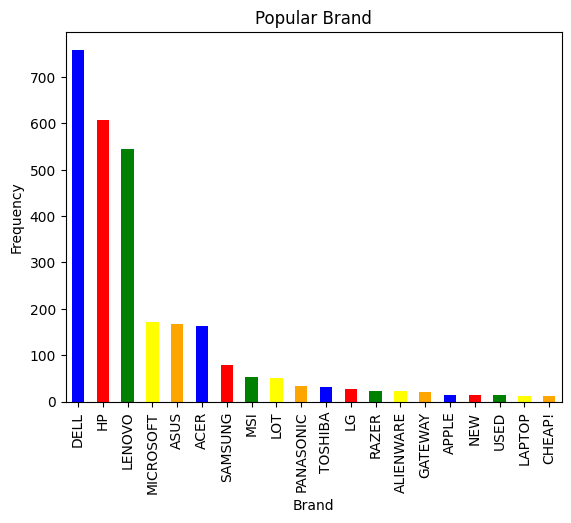

In [57]:
df_Item7['Brand'].value_counts().head(20).plot(kind='bar',title='Popular Brand', color = ['blue','red','green','yellow','orange'])
plt.xlabel('Brand')
plt.ylabel('Frequency');

## RAM

In [58]:
df_Item7['RAM'].value_counts()

RAM
NONSPACIFIED    2132
8GB RAM          367
16GB RAM         281
4GB RAM          243
32GB RAM          44
2GB RAM           30
12GB RAM          26
24GB RAM           8
6GB RAM            5
64GB RAM           5
3GB RAM            1
Name: count, dtype: int64

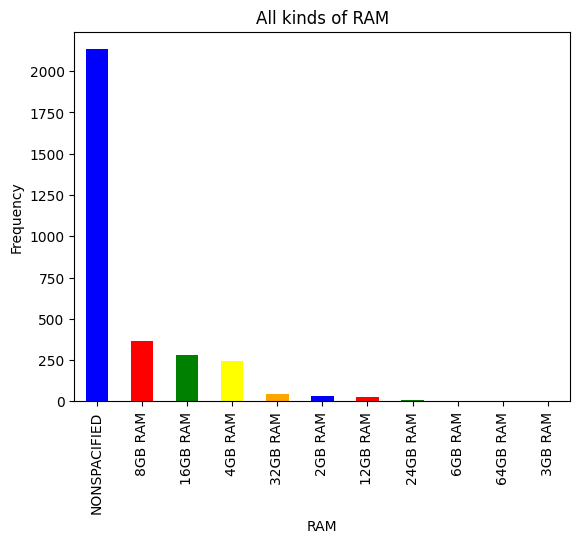

In [59]:
df_Item7['RAM'].value_counts().plot(kind='bar',title='All kinds of RAM', color = ['blue','red','green','yellow','orange'])
plt.xlabel('RAM')
plt.ylabel('Frequency');

Not specified RAM is the first desire for the customers, but actually ebay category that as not specified may be it mixed between all Brands. Therefore I'll accept the results 8GB RAM is the most Brand the customer want it, mediorate features with low price. Next 16GB RAM.

## Outliers Plot

[Text(0, 0, '32GB RAM'),
 Text(1, 0, '8GB RAM'),
 Text(2, 0, 'NONSPACIFIED'),
 Text(3, 0, '16GB RAM'),
 Text(4, 0, '4GB RAM'),
 Text(5, 0, '2GB RAM'),
 Text(6, 0, '12GB RAM'),
 Text(7, 0, '6GB RAM'),
 Text(8, 0, '24GB RAM'),
 Text(9, 0, '64GB RAM'),
 Text(10, 0, '3GB RAM')]

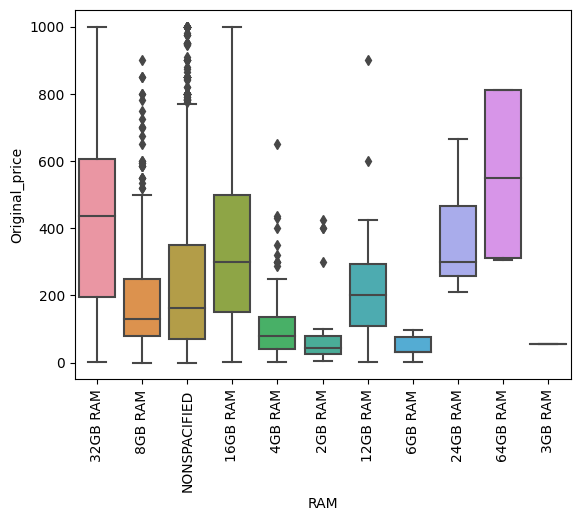

In [60]:
# Original_price
df_Item7 = df_Item7.explode('Original_price')
df_Item7['Original_price'] = df_Item7['Original_price'].astype('float')
ax = sns.boxplot(x='RAM', y ='Original_price', data = df_Item7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, '32GB RAM'),
 Text(1, 0, '8GB RAM'),
 Text(2, 0, 'NONSPACIFIED'),
 Text(3, 0, '16GB RAM'),
 Text(4, 0, '4GB RAM'),
 Text(5, 0, '2GB RAM'),
 Text(6, 0, '12GB RAM'),
 Text(7, 0, '6GB RAM'),
 Text(8, 0, '24GB RAM'),
 Text(9, 0, '64GB RAM'),
 Text(10, 0, '3GB RAM')]

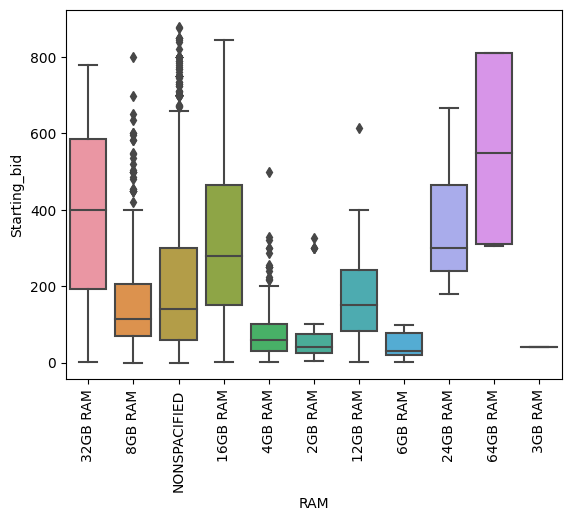

In [62]:
# Starting_bid
df_Item7 = df_Item7.explode('Starting_bid')
df_Item7['Starting_bid'] = df_Item7['Starting_bid'].astype('float')
ax = sns.boxplot(x='RAM', y ='Starting_bid', data = df_Item7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '32GB RAM'),
  Text(1, 0, '8GB RAM'),
  Text(2, 0, 'NONSPACIFIED'),
  Text(3, 0, '16GB RAM'),
  Text(4, 0, '4GB RAM'),
  Text(5, 0, '2GB RAM'),
  Text(6, 0, '12GB RAM'),
  Text(7, 0, '6GB RAM'),
  Text(8, 0, '24GB RAM'),
  Text(9, 0, '64GB RAM'),
  Text(10, 0, '3GB RAM')])

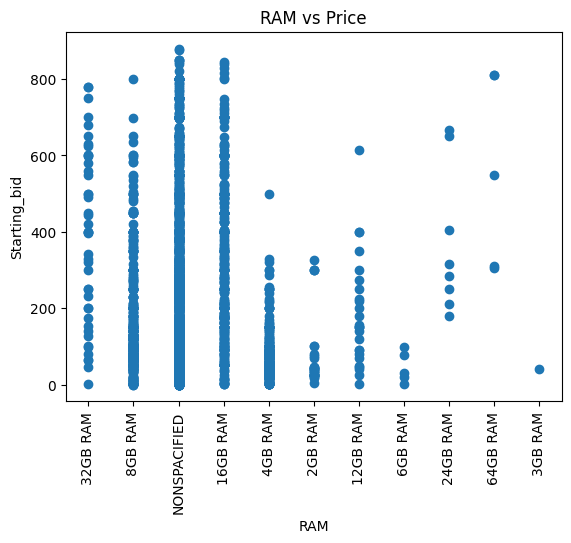

In [63]:
x = df_Item7['RAM']
y = df_Item7['Starting_bid']
plt.scatter(x, y)
plt.title("RAM vs Price")
plt.xlabel('RAM')
plt.ylabel('Starting_bid')
plt.xticks(rotation = 90)

## Condition Column

In [64]:
df_Item7['Condition'].value_counts()

Condition
USED                                                                                        2458
FOR PARTS OR NOT WORKING                                                                     296
OPEN BOX                                                                                     222
NEW                                                                                          152
GOOD - REFURBISHED                                                                             4
VERY GOOD - REFURBISHED                                                                        3
THE SELLER IS AWAY UNTIL JUN 27, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.       2
THE SELLER IS AWAY UNTIL JUN 25, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.       2
THE SELLER IS AWAY UNTIL JUL 03, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.       2
THE SELLER IS AWAY UNTIL JUN 24, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.       1
Name: count, dtype: 

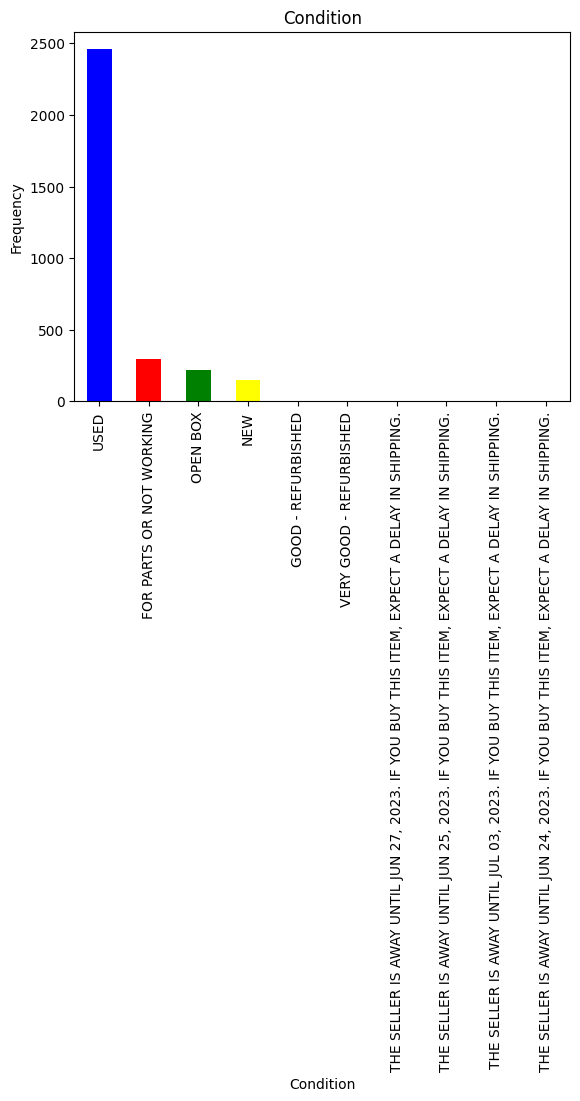

In [65]:
df_Item7['Condition'].value_counts().plot(kind='bar',title='Condition', color = ['blue','red','green','yellow','orange'])
plt.xlabel('Condition')
plt.ylabel('Frequency');

### Note:
From this plot , customers prefer to sell and buy the used item than buying new one.

[Text(0, 0, 'USED'),
 Text(1, 0, 'NEW'),
 Text(2, 0, 'FOR PARTS OR NOT WORKING'),
 Text(3, 0, 'OPEN BOX'),
 Text(4, 0, 'GOOD - REFURBISHED'),
 Text(5, 0, 'VERY GOOD - REFURBISHED'),
 Text(6, 0, 'THE SELLER IS AWAY UNTIL JUN 24, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.'),
 Text(7, 0, 'THE SELLER IS AWAY UNTIL JUN 27, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.'),
 Text(8, 0, 'THE SELLER IS AWAY UNTIL JUN 25, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.'),
 Text(9, 0, 'THE SELLER IS AWAY UNTIL JUL 03, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.')]

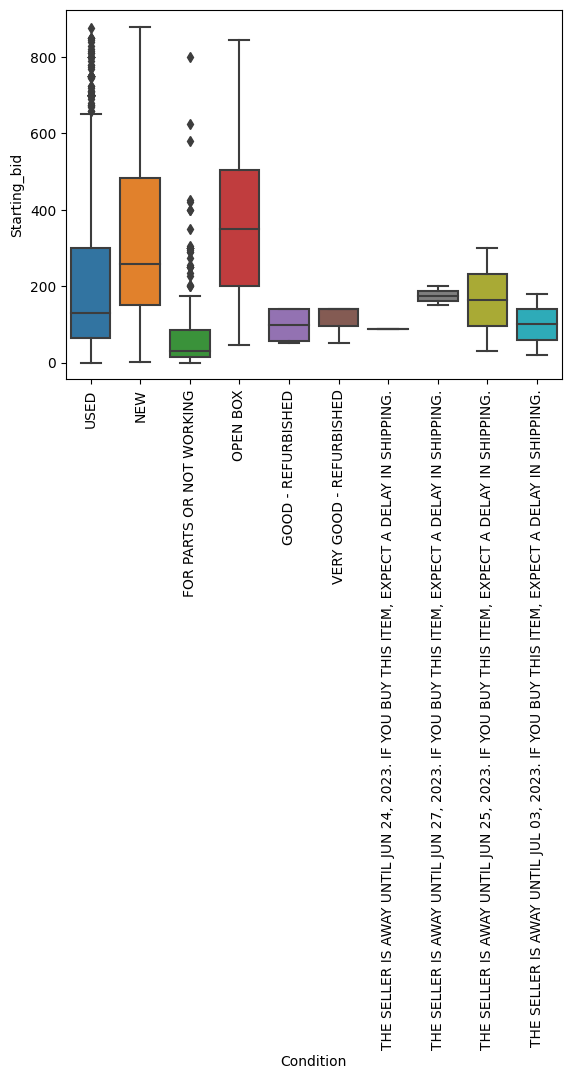

In [66]:
# Outliers 
df_Item7['Condition'].value_counts()
ax = sns.boxplot(x= 'Condition', y = 'Starting_bid', data = df_Item7)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'USED'),
  Text(1, 0, 'NEW'),
  Text(2, 0, 'FOR PARTS OR NOT WORKING'),
  Text(3, 0, 'OPEN BOX'),
  Text(4, 0, 'GOOD - REFURBISHED'),
  Text(5, 0, 'VERY GOOD - REFURBISHED'),
  Text(6, 0, 'THE SELLER IS AWAY UNTIL JUN 24, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.'),
  Text(7, 0, 'THE SELLER IS AWAY UNTIL JUN 27, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.'),
  Text(8, 0, 'THE SELLER IS AWAY UNTIL JUN 25, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.'),
  Text(9, 0, 'THE SELLER IS AWAY UNTIL JUL 03, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.')])

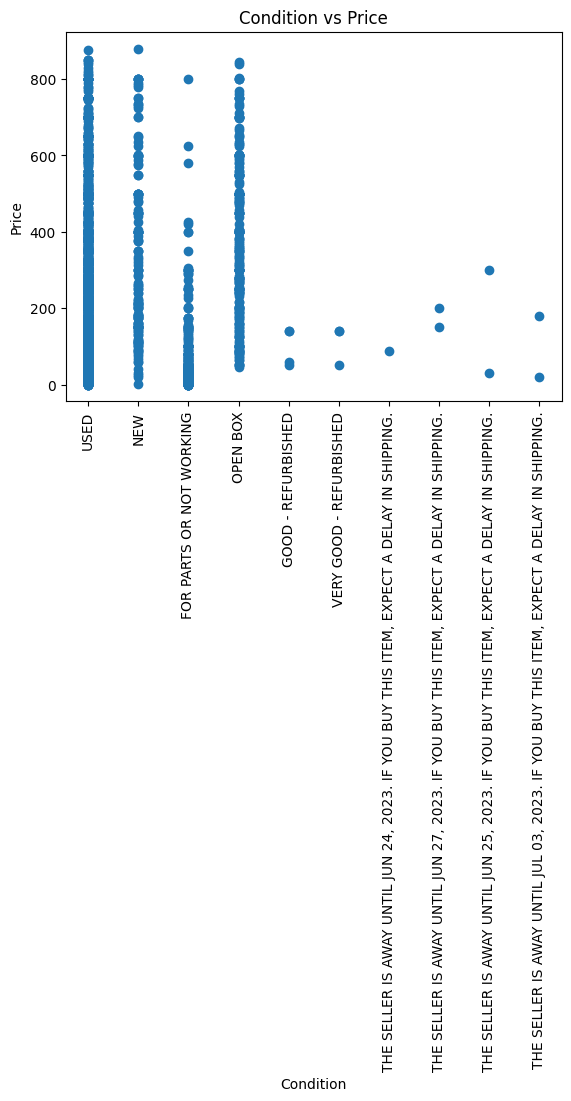

In [67]:
x = df_Item7['Condition']
y = df_Item7['Starting_bid']
plt.scatter(x, y)
plt.title("Condition vs Price")
plt.xlabel('Condition')
plt.ylabel('Price')
plt.xticks(rotation = 90)

## Currency Column

In [68]:
df_Item7['Currency'].value_counts()

Currency
US    3056
C       83
AU       3
Name: count, dtype: int64

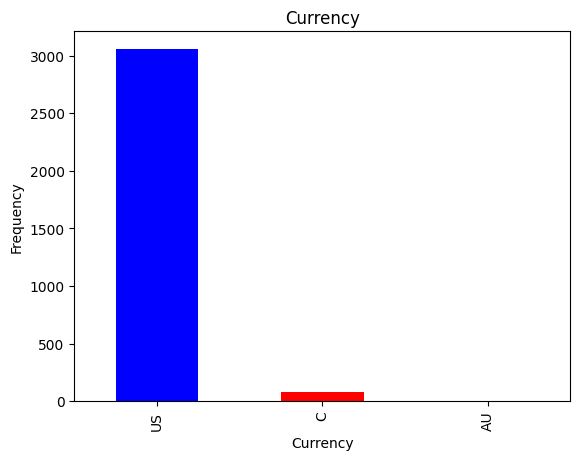

In [69]:
df_Item7['Currency'].value_counts().plot(kind='bar',title='Currency', color = ['blue','red','green','yellow','orange'])
plt.xlabel('Currency')
plt.ylabel('Frequency');

From the currency , we can guest the nationality of customers. The plot show high trades , sell, and buy for people from USA comparing to Canada.

Although I converted the format from beginning and was good but when I wanted to plot , I foun problem. Thus I checked the format . Now, I need to convert them again.

In [70]:
df_Item7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3142 entries, 1 to 3553
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           3142 non-null   object 
 1   Original_price  3142 non-null   float64
 2   Starting_bid    3142 non-null   float64
 3   Currency        3142 non-null   object 
 4   Condition       3142 non-null   object 
 5   Brand           3142 non-null   object 
 6   RAM             3142 non-null   object 
dtypes: float64(2), object(5)
memory usage: 196.4+ KB


In [71]:
df_Item7['Original_price'] = df_Item7['Original_price'].astype(float)

In [72]:
df_Item7['Starting_bid'] = df_Item7['Starting_bid'].astype(float)

In [73]:
df_Item7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3142 entries, 1 to 3553
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           3142 non-null   object 
 1   Original_price  3142 non-null   float64
 2   Starting_bid    3142 non-null   float64
 3   Currency        3142 non-null   object 
 4   Condition       3142 non-null   object 
 5   Brand           3142 non-null   object 
 6   RAM             3142 non-null   object 
dtypes: float64(2), object(5)
memory usage: 196.4+ KB


## Plot groups

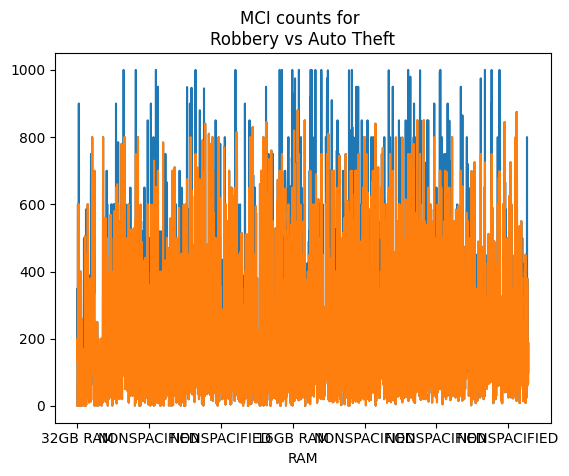

In [74]:
df_Item7.set_index('RAM')['Original_price'].plot(kind='line')
df_Item7.set_index('RAM')['Starting_bid'].plot(kind='line')

plt.title('MCI counts for \nRobbery vs Auto Theft');

#### Plot Brand vs the Cost

<Axes: xlabel='Brand'>

C:\Users\alhai\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  func(*args, **kwargs)
C:\Users\alhai\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  func(*args, **kwargs)
C:\Users\alhai\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\alhai\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


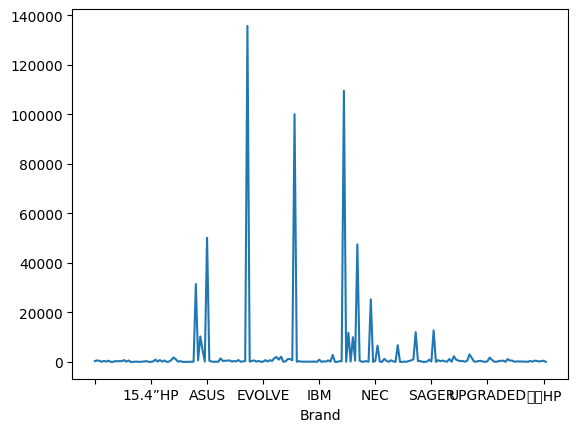

In [75]:
df_Item7.groupby(['Brand'])['Starting_bid'].sum().plot()

We notice the highest price is EVOLVE, NEC, then IBM

#### Plot RAM vs the Cost

<Axes: xlabel='RAM'>

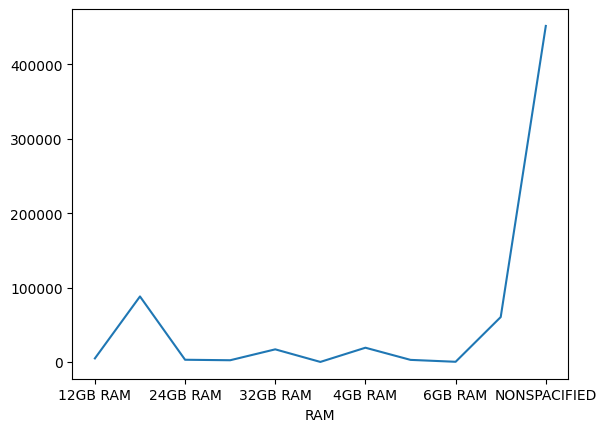

In [76]:
df_Item7.groupby(['RAM'])['Starting_bid'].sum().plot()

# <font color='#347B98'> Seaborn

In [77]:
import seaborn as sns
sns.set(style="ticks", color_codes=True) # for plot styling

C:\Users\alhai\AppData\Local\Temp\ipykernel_26356\4238611066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Item7['Starting_bid']);


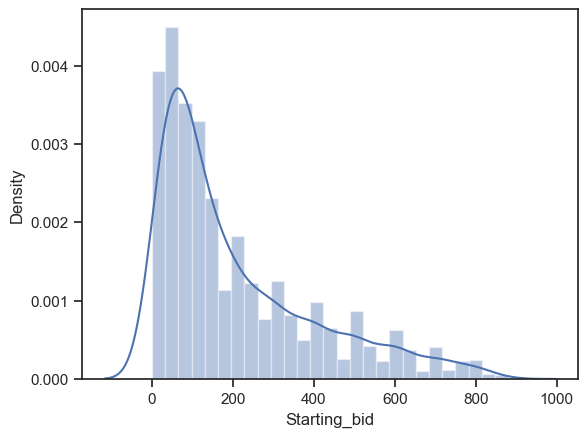

In [78]:
sns.distplot(df_Item7['Starting_bid']);

The density shows there is kind of skew for the price.

##  Pairplot
- Returns the distribution of each variable.
- Returns the relationship between each variable.

C:\Users\alhai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


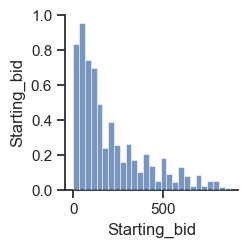

In [79]:
sns.pairplot(df_Item7[['Condition', 'Starting_bid']]);

C:\Users\alhai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


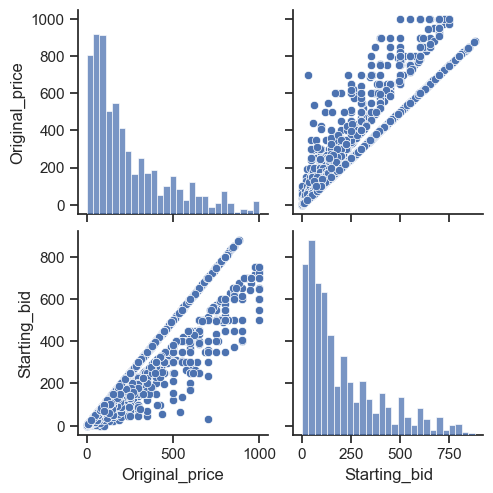

In [80]:
sns.pairplot(df_Item7)

Those plot show the relation between Starting_bid and Original_price under Auction parameter.

## Plot using matplotlib

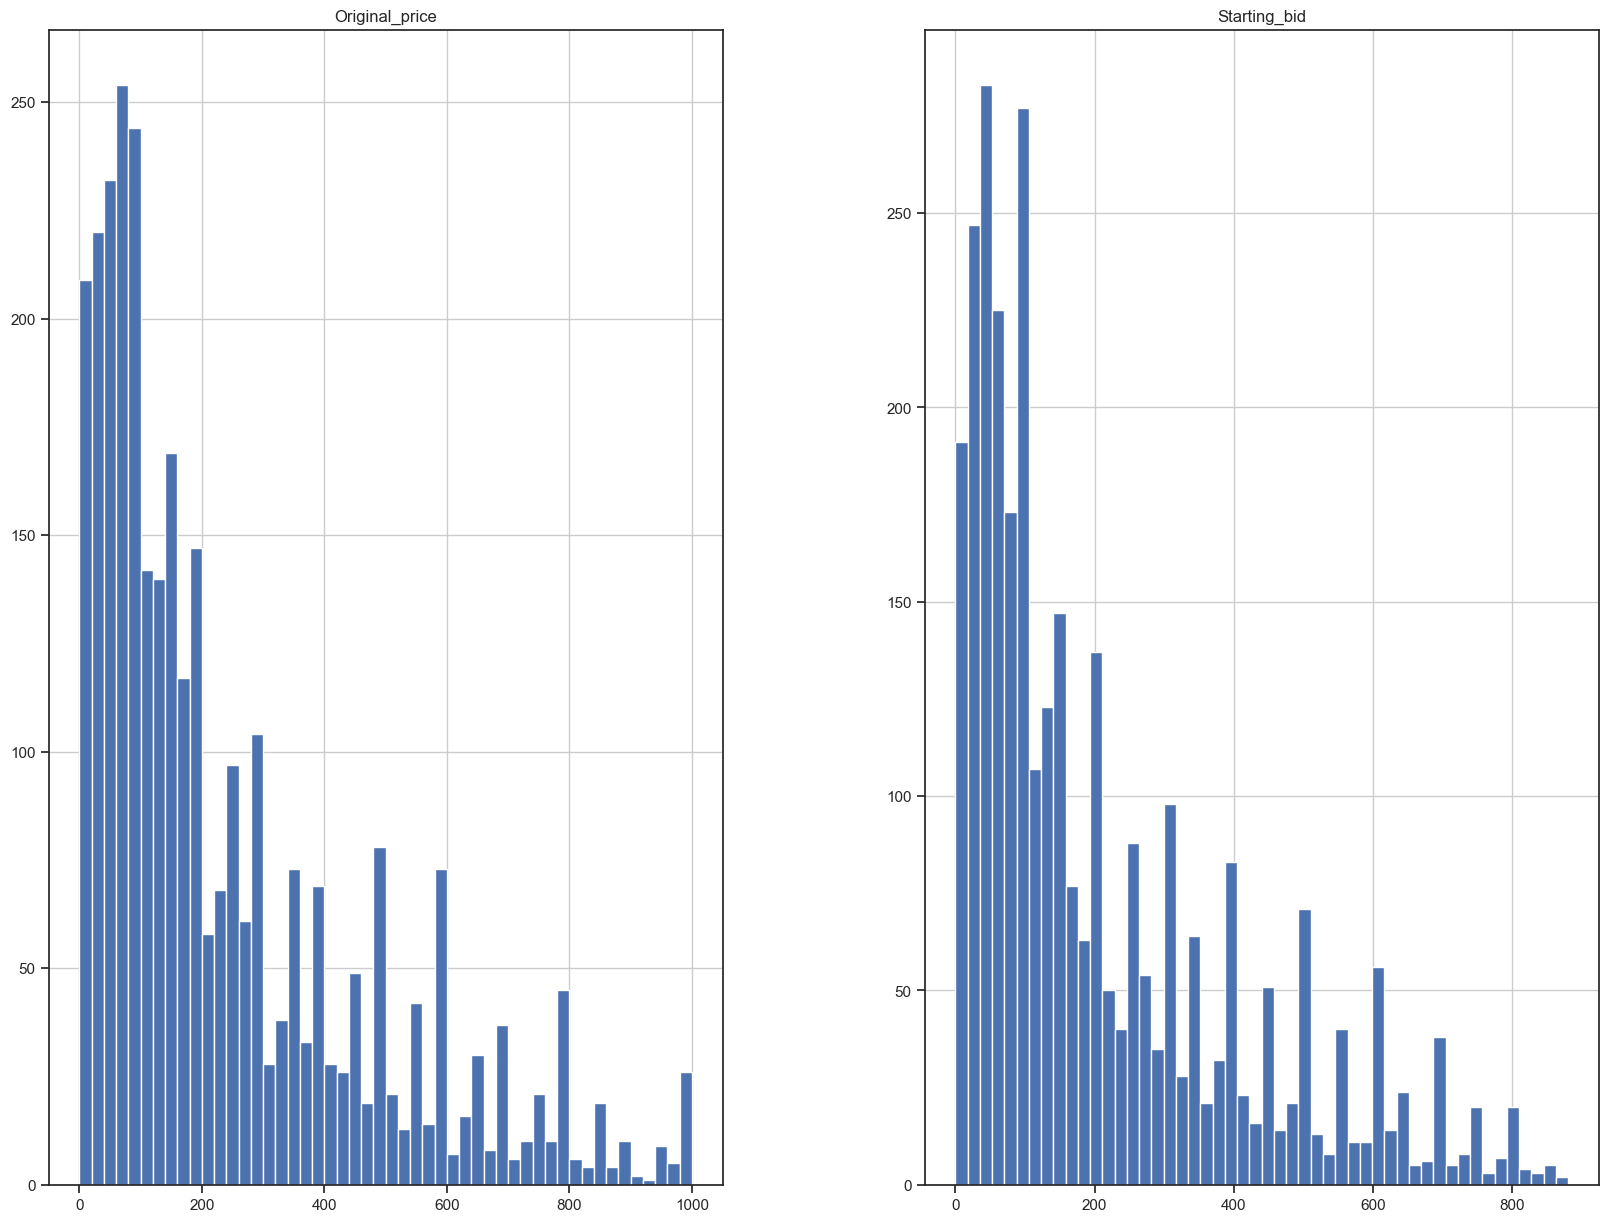

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
df_Item7.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Those plot show the compartion distrbution between Starting_bid and Original_price.

# Heatmaps

We could not create Heatmap directly from our variables because they are objects. But in the future we can do that by using Machine Learning. But I created Heatmaps. Firstly choose three variables and then apply groupby on the two objects. Secondly wrote two codes to plot the heatmaps.

### Heatmap for the relation between the RAM and Condtion and the price.

In [82]:
df_Item7_test = df_Item7[['RAM', 'Condition', 'Starting_bid']]
df_Item7_grp = df_Item7_test.groupby(['RAM', 'Condition']).mean()
df_Item7_grp

Starting_bid
RAM          Condition                                                                                             
12GB RAM     FOR PARTS OR NOT WORKING                                                                         97.75
             OPEN BOX                                                                                        399.00
             USED                                                                                            199.08
16GB RAM     FOR PARTS OR NOT WORKING                                                                        164.89
             NEW                                                                                             434.82
             OPEN BOX                                                                                        448.85
             USED                                                                                            301.74
24GB RAM     OPEN BOX                                                                                        535.50
             USED                                                                                            315.00
2GB RAM      FOR PARTS OR NOT WORKING                                                                         43.75
             OPEN BOX                                                                                        200.05
             USED                                                                                             71.55
32GB RAM     FOR PARTS OR NOT WORKING                                                                         99.00
             USED                                                                                            398.84
3GB RAM      USED                                                                                             40.00
4GB RAM      FOR PARTS OR NOT WORKING                                                                         38.73
             GOOD - REFURBISHED                                                                               60.00
             NEW                                                                                             168.38
             OPEN BOX                                                                                        142.85
             THE SELLER IS AWAY UNTIL JUN 27, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.        199.99
             USED                                                                                             71.96
64GB RAM     USED                                                                                            556.80
6GB RAM      USED                                                                                             45.37
8GB RAM      FOR PARTS OR NOT WORKING                                                                         69.72
             GOOD - REFURBISHED                                                                              139.00
             NEW                                                                                             390.19
             OPEN BOX                                                                                        287.45
             THE SELLER IS AWAY UNTIL JUN 24, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.         87.50
             USED                                                                                            152.20
             VERY GOOD - REFURBISHED                                                                         139.00
NONSPACIFIED FOR PARTS OR NOT WORKING                                                                         67.79
             GOOD - REFURBISHED                                                                               49.99
             NEW                                                                                             344.50
             OPEN BOX                      

## Pivot Table

In [83]:
df_Item7_pivot = pd.pivot_table(df_Item7_grp, values='Starting_bid', index=["RAM"],
                       columns=["Condition"], aggfunc=np.sum)
df_Item7_pivot

Condition     FOR PARTS OR NOT WORKING  GOOD - REFURBISHED    NEW  OPEN BOX  \
RAM                                                                           
12GB RAM                         97.75                 NaN    NaN    399.00   
16GB RAM                        164.89                 NaN 434.82    448.85   
24GB RAM                           NaN                 NaN    NaN    535.50   
2GB RAM                          43.75                 NaN    NaN    200.05   
32GB RAM                         99.00                 NaN    NaN       NaN   
3GB RAM                            NaN                 NaN    NaN       NaN   
4GB RAM                          38.73               60.00 168.38    142.85   
64GB RAM                           NaN                 NaN    NaN       NaN   
6GB RAM                            NaN                 NaN    NaN       NaN   
8GB RAM                          69.72              139.00 390.19    287.45   
NONSPACIFIED                     67.79               49.99 344.50    379.25   

Condition     THE SELLER IS AWAY UNTIL JUL 03, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.  \
RAM                                                                                                      
12GB RAM                                                                                           NaN   
16GB RAM                                                                                           NaN   
24GB RAM                                                                                           NaN   
2GB RAM                                                                                            NaN   
32GB RAM                                                                                           NaN   
3GB RAM                                                                                            NaN   
4GB RAM                                                                                            NaN   
64GB RAM                                                                                           NaN   
6GB RAM                                                                                            NaN   
8GB RAM                                                                                            NaN   
NONSPACIFIED                                                                                    100.00   

Condition     THE SELLER IS AWAY UNTIL JUN 24, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.  \
RAM                                                                                                      
12GB RAM                                                                                           NaN   
16GB RAM                                                                                           NaN   
24GB RAM                                                                                           NaN   
2GB RAM                                                                                            NaN   
32GB RAM                                                                                           NaN   
3GB RAM                                                                                            NaN   
4GB RAM                                                                                            NaN   
64GB RAM                                                                                           NaN   
6GB RAM                                                                                            NaN   
8GB RAM                                                                                          87.50   
NONSPACIFIED                                                                                       NaN   

Condition     THE SELLER IS AWAY UNTIL JUN 25, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.  \
RAM                                                                                                      
12

### Note:
Nan in the pivot table means there is no matching found between the varibles from the automated data. And on the table shows white blanck.

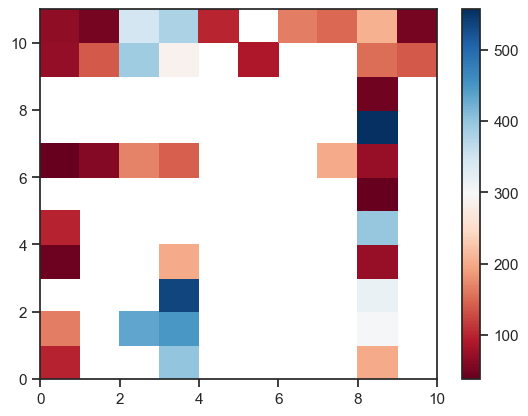

In [84]:
df_Item7_pivot
plt.pcolor(df_Item7_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

### Correlation 
from Pivot table. 
There are strong correlation between the price and the condition.
The used condition is the most popular requesting from the customers.

In [85]:
 df_Item7_pivot.corr().fillna(0)

Condition                                                                                 FOR PARTS OR NOT WORKING  \
Condition                                                                                                            
FOR PARTS OR NOT WORKING                                                                                      1.00   
GOOD - REFURBISHED                                                                                            0.46   
NEW                                                                                                           0.76   
OPEN BOX                                                                                                      0.84   
THE SELLER IS AWAY UNTIL JUL 03, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.                      0.00   
THE SELLER IS AWAY UNTIL JUN 24, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.                      0.00   
THE SELLER IS AWAY UNTIL JUN 25, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.                      0.00   
THE SELLER IS AWAY UNTIL JUN 27, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.                     -1.00   
USED                                                                                                          0.74   
VERY GOOD - REFURBISHED                                                                                       1.00   

Condition                                                                                 GOOD - REFURBISHED  \
Condition                                                                                                      
FOR PARTS OR NOT WORKING                                                                                0.46   
GOOD - REFURBISHED                                                                                      1.00   
NEW                                                                                                     0.58   
OPEN BOX                                                                                                0.03   
THE SELLER IS AWAY UNTIL JUL 03, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.                0.00   
THE SELLER IS AWAY UNTIL JUN 24, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.                0.00   
THE SELLER IS AWAY UNTIL JUN 25, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.                0.00   
THE SELLER IS AWAY UNTIL JUN 27, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.                1.00   
USED                                                                                                    0.01   
VERY GOOD - REFURBISHED                                                                                 1.00   

Condition                                                                                  NEW  \
Condition                                                                                        
FOR PARTS OR NOT WORKING                                                                  0.76   
GOOD - REFURBISHED                                                                        0.58   
NEW                                                                                       1.00   
OPEN BOX                                                                                  0.89   
THE SELLER IS AWAY UNTIL JUL 03, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.  0.00   
THE SELLER IS AWAY UNTIL JUN 24, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.  0.00   
THE SELLER IS AWAY UNTIL JUN 25, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING.  0.00   
THE SELLER IS AWAY UNTIL JUN 27, 2023. IF YOU BUY THIS ITEM, EXPECT A DELAY IN SHIPPING. -1.00   
USED                                                                                      0.85   
VERY GOOD - REFURBISHED                                                                   1.00   

Condition                                                    

### The End